# <center>Text Mining</center>

___

Text data falls into the category of unstructured data and requires some preparation before it can be used for modeling. Text preperation is different from structed data pre-processing.

Today we will go through the process of preparing text data and building a predictive model on it.

# Text Mining Lab Activity - Topic Modeling

## Agenda


- Introduction to Text mining
    - Regular Expression for special character removal
    - Removal of accented characters and expanding contractions
    - Tokenisation
    - Stop Word Removal
    - Stemming and Lemmatization
- TF-IDF
- Clustering
- SVD using scikitlearn

## Topic Modeling
Topic Modeling automatically discover the hidden themes from given documents. It is an unsupervised text analytics algorithm that is used for finding the group of words from the given document. These group of words represents a topic. There is a possibility that, a single document can associate with multiple themes.


## Comparison Between Text Classification and Topic Modeling
Text classification is a supervised machine learning problem, where a text document or article classified into a pre-defined set of classes. Topic modeling is the process of discovering groups of co-occurring words in text documents. These group co-occurring related words makes "topics". It is a form of unsupervised learning, so the set of possible topics are unknown. Topic modeling can be used to solve the text classification problem. Topic modeling will identify the topics presents in a document" while text classification classifies the text into a single class.


## Use Cases of Topic Modeling
Simple applications in which this technique is used are documented clustering in text analysis, recommender systems, and information retrieval. More detailed use-cases of topic modeling are:

**Resume Summarization:** It can help recruiters to evaluate resumes by a quick glance. They can reduce effort in filtering pile of resume.<br><br>

**Search Engine Optimization:** Online articles, blogs, and documents can be tagged easily by identifying the topics and associated keywords, which can improve optimize search results.<br><br>

**Recommender System Optimization:** Recommender systems act as an information filter and advisor according to the user profile and previous history. It can help us to discover unvisited relevant content based on past visits.<br><br>
    
**Improving Customer Support:** Discovering relevant topics and associated keywords in customer complaints and feedback for examples product and service specifications, department, and branch details. Such information help company to directly rotated the complaint in respective department.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

#!pip install urllib
import urllib.request as url 

#!pip install bs4
from bs4 import BeautifulSoup as bs

#!pip install wordcloud
from wordcloud import WordCloud

import re
import requests
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(123)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!conda install -c conda-forge spacy
#!python -m spacy download en
#!pip install -U spacy
import spacy
nlp = spacy.load("en_core_web_sm")

#if the above code fails
# import en_core_web_sm
# nlp = en_core_web_sm.load()

## Bird's View of the Text analytics Activity

<img src='text_model_lifecycle.png'>

## A Small Introduction to Hyper Text Markup Language (HTML)

Hypertext Markup Language is the standard markup language for documents designed to be displayed in a web browser. It can be assisted by technologies such as Cascading Style Sheets(CSS) and scripting languages such as JavaScript(JS).<br>

- HTML describes the structure of a Web page
- HTML consists of a series of elements
- HTML elements tell the browser how to display the content
- HTML elements are represented by tags
- HTML tags label pieces of content such as "heading", "paragraph", "table", and so on
- Browsers do not display the HTML tags, but use them to render the content of the page


#### Simple HTML document code to be added

- The <!DOCTYPE html> declaration defines this document to be HTML5
- The < html> element is the root element of an HTML page
- The < head> element contains meta information about the document
- The < title> element specifies a title for the document
- The < body> element contains the visible page content
- The < h1> element defines a large heading
- The < p> element defines a paragraph


#### HTML Tags

HTML tags are element names surrounded by angle brackets

Example: < tagname>content goes here...</ tagname>

- HTML tags normally come in pairs like < p> and < /p>
- The first tag in a pair is the start tag, the second tag is the end tag
- The end tag is written like the start tag, but with a forward slash inserted before the tag name

#### HTML Page Structure

<img src='pagestructure.jpg' >


#### Most Commonly Used Tags

- __Div__ tag: div tag is used as a container to represent an area on the screen.

- __Anchor__ tag: It is used to link one page to another page.<br>
  < a href="..."> Statements... < /a>
  
- __List__ tag: It is used to list the content.<br>
  < li> Statements... < /li>
  
- __Ordered List__ tag: It is used to list the content in a particular order.<br>
  < ol> Statements... < /ol><br><br>
  < ol>  
        < li>List item 1< /li>  
        < li>List item 2< /li> 
        < li>List item 3< /li>  
        < li>List item 4< /li>  
  < /ol>
  
- __Unordered List__ tag: It is used to list the content without order.<br>
  < ul> Statements... < /ul><br><br>
  < ul>  
        < ul>List item< /ul>  
        < ul>List item< /ul> 
        < ul>List item< /ul>  
        < ul>List item< /ul>  
  < /ul>
  
- __Image__ tag: It is used to add image element in html document.<br>
  < img src="" width="40" height="40" >

- __Tables__ Tags: Table tag is used to create a table in html document.<br>
        < table> 
          < tr> 
            < th>Month< /th> 
            < th>Savings< /th> 
          < /tr> 
          < tr> 
            < td>January< /td> 
            < td>100< /td> 
          < /tr> 
         < /table>
<br>
         <ul>
             <li>Th tag: It defines the header cell in a table. </li>
             <li>Tr tag: It is used to define row of html table.</li>
             <li>Td tag: (Table division) It defines the standard cell in html document.</li>
         </ul>

- __Form__ tag: It is used to create html form for user.<br>
    Submit input tag: It is used to take the input from the user.
 

        < form method=post action="/cgibin/example.cgi"> 
            < input type="text" maxlength="30">  
            < input type="Submit" value="Submit">  
        < /form>

# Web Scraping with BeautifulSoup

This activity will use the below modules:

- Requests: To make web requests

- Beautiful Soup: To extract data from the HTML response

BeautifulSoup can extract single or multiple occurrences of a specific tag and can also accept search criteria based on attributes such as:

- __Find__: This function takes the name of the tag as string input and returns the first found match of the particular tag from the webpage response<br>

- __Findall__: Use find_all to extract all the occurrences of a particular tag from the page response.<br>
find_all returns an object of ResultSet which offers index based access to the result of found occurrences and can be printed using a for loop.<br>
find_all can accept a list of tags as soup.find_all(['th', 'td']) and parameters like id to find tags with unique id

- __Select__: This function finds multiple instances and returns a list.<br>

- __Attribute Driven Search__: Most of the times attributes like id, class, or value are used to further refine the search. <br> Example soup.find_all('table')

- __Nested Tags__: Nested tags can be found using the select method.<br>
  Example: soup.select("html head p")[0].get_text()<br><br>
  

Beautiful Soup also provides navigation properties like

- __next_sibling__ and __previous_sibling__: To traverse tags at same level, like tr or td within the same tag.

- __next_element__ and __previous_element__: To shift HTML elements.<br><br>


Points To Remember: <br>
- **The logic to extract the data usually depends upon the HTML structure of the webpage, so some changes in structure can break the logic.**

- **The content of a website can be subject to applied laws, so make sure to read the terms and conditions about content**

# Problem Statement: Determining the Latent Topics from blogs

## First Level Extraction
Extracting all **Authors** and their corresponding **blog links** at **level 1:**

https://indianbloggers.org/


## Second Level Extraction
For each blogger we will perfom a web scrapping from their respestive blog page and get links for other blogs of the same blogger:

## Third Level web scraping
In the third level we will extract the **blog contents** of each blog.  



In [3]:
html = "https://indianbloggers.org/"

def extract_web(link):
    html = url.urlopen(link).read()
    soup = bs(html, 'html.parser')
    d = {'title':[],'links':[]}
    for link in soup.find_all('a'):
         if len(link.text.strip()) > 1 and bool(re.match('http',link['href'])) and not bool(
            re.search('indianblogginers|indianbloggers|twitter|facebook|images|youtube|docs.google.com',link['href'])) and not bool(
            re.search('next page|about|store|meeting|google|contact|jan|feb|mar|apr|jun|jul|aug|sep|oct|nov|dec|january|february|march|april|may|june|july|august|september|october|november|december|f.a.q.|faq',link.text.lower())) :
            d['title'].append(link.text)
            d['links'].append(link['href'])

    blog_list = pd.DataFrame(d)
    return blog_list

blog_list = extract_web(html)

In [4]:
blog_list.head(15)

title                               links
0                    Amit Agarwal              http://www.labnol.org/
1                   Jyotsna Kamat  http://www.kamat.com/jyotsna/blog/
2                      Amit Varma          http://www.indiauncut.com/
3                   Sidin Vadukut              http://www.whatay.com/
4                         Hawkeye     http://hawkeyeview.blogspot.in/
5                            Neha    http://www.withinandwithout.com/
6                   Rashmi Bansal      http://youthcurry.blogspot.in/
7                      Dina Mehta               http://dinamehta.com/
8                    Amit Agarwal              http://www.labnol.org/
9                          Patrix             http://www.ipatrix.com/
10                 Kiruba Shankar              http://www.kiruba.com/
11  Chandrachoodan Gopalakrishnan    http://www.selectiveamnesia.org/
12                  Gaurav Sabnis    http://gauravsabnis.blogspot.in/
13                   Gautam Ghosh         http://gauteg.blogspot.com/
14            Kirupa Chinnathambi              http://www.kirupa.com/

In [5]:
blog_list.shape

(338, 2)

## Web scrapping of second level from the above table

In [6]:
blog_list_2nd = pd.DataFrame(columns=['Author','title', 'links'])

for rownum, blogs in blog_list[0:10].iterrows():
    
    try :
        temp = extract_web(blogs['links'])
        temp['Author'] = blogs['title']
        blog_list_2nd = pd.concat([blog_list_2nd, temp])
        
    except:
        pass

In [7]:
blog_list_2nd

Author                                              links  \
0   Amit Agarwal                    https://digitalinspiration.dev/   
1   Amit Agarwal  https://gsuite.google.com/marketplace/app/mail...   
2   Amit Agarwal  https://gsuite.google.com/marketplace/app/docu...   
3   Amit Agarwal                            https://emailstudio.pro   
4   Amit Agarwal  https://gsuite.google.com/marketplace/app/crea...   
..           ...                                                ...   
14  Amit Agarwal  https://gsuite.google.com/marketplace/app/crea...   
15  Amit Agarwal  https://lifehacker.com/im-amit-agarwal-and-thi...   
16  Amit Agarwal  https://yourstory.com/2015/07/techie-tuesdays-...   
17  Amit Agarwal  https://us1.list-manage.com/subscribe?u=f52af1...   
18  Amit Agarwal                     https://digitalinspiration.dev   

                        title  
0              Ask a Question  
1        Mail Merge for Gmail  
2             Document Studio  
3      Email Studio for Gmail  
4   Creator Studio for Slides  
..                        ...  
14                   Download  
15                 Lifehacker  
16                  YourStory  
17           email newsletter  
18               Tech Support  

[517 rows x 3 columns]

# Level 3

# Scraping the Blogs

In [8]:
%%time
data = {'Author':[], 'title':[], 'link':[], 'text':[]}

for rownum, row in blog_list_2nd.iterrows():
    author = row['Author']
    title = row['title']
    link = row['links']
    
    try:
        html = url.urlopen(link).read()
        soup = bs(html, 'html.parser')
        form_p_all = soup.select('p > form') # Selecting forms that are there inside the paragraphs
        for form in form_p_all:
            form.decompose()
            
        #Navigations in the side
        nav_div = soup.find_all('div', id=re.compile(".*[nav].$"))
        for nav in nav_div:
            nav.decompose()

        text_links = soup.select('p > a') # Selecting the links that are present inside the paragraph
        for text_link in text_links:
            text_link.replaceWith('')
            text_link.decompose()
    
        text_all = soup.find_all('p') #Selecting all the paragraphs
        text_data = ""
        for text in text_all:
            if not 'copyright' in text.text.lower():
                text_data = text_data +" " +text.text
    except:
        pass
    
    if text_data != "":
        print(text_data)
        data['Author'].append(author)
        data['title'].append(title)
        data['link'].append(link)
        data['text'].append(text_data)

 
Username*


 
E-Mail*


 
Password*


 
Confirm Password*


 







 
Username*


 
Password*


 


 Lost your password? Please enter your email address. You will receive a link and will create a new password via email. 
E-Mail*


 






 You must login to ask question. 
Username*


 
Password*


 



 Email Studio adds power tools to Gmail including Recurring Scheduler, Forwarder, Smart
                            Auto-Responder and Archiver. Send emails later at your preferred date and time on a recurring
                            schedule. Quickly create multiple copies of any draft message in Gmail. Forward your emails to any other email address, automatically.
                         Send smart auto-replies both old and incoming email messages. Unsubcribe from bulk mails, auto-purge messages older than few
                            days. Send personalized email messages to multiple Google Contacts. Send personalized emails, schedule messages, send smart auto-replies, bulk

 
Username*


 
E-Mail*


 
Password*


 
Confirm Password*


 







 
Username*


 
Password*


 


 Lost your password? Please enter your email address. You will receive a link and will create a new password via email. 
E-Mail*


 






 You must login to ask question. 
Username*


 
Password*


 



 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 

 


  On Blogger since
June 2004 Profile views
-
15062
 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life.

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
Brilliant, subtle and to the point. conclusion was hurried through. if both should not be compared how did you conclude that NEET is an assault on TN or upper funnel strategy?The need is a new game plan and not to dismiss it (in your own words). TN had entrance exam till about 10 years or so ago. so it's not new.why NEET is a problem? not because it assaults upper funnel strategy but because of inherent contradiction in our education system with legalities like applicability of article 30 (1).
 
Sir - by the same token, shouldn't each college (or at least the states hosting such colleges) be free to decide the funnel strategy they use for student intake? To counter

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 

 


  On Blogger since
June 2004 Profile views
-
15068
 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 

 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 I am the essence of overconfidence! I am speculation, advent

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
Great book, awesome post !! SRW was my biggest hero during my schooling days when I used to play cricket for my district and his exploits against the Windies was cricketing folklore at school(I think I still have those two Sportstar centrespreads tucked away in some corner of my Trichy house)I loved your post on John Wright's autobio also and am planning to buy the book next. Ever read that critically acclaimed Brearley's book? Would you really recommend it as a good read?Keep penning mate !- J
 
tendulkar has never hit a six off Ambrose, theriyumo
 
looks like Steve Waugh bought into the hype by cricket analysts about his fighting qualities. This fighting quality 

  On Blogger since
June 2004 Profile views
-
15069
 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
I used to wait for the Sports Specials on Saturdays. I still remember that after a few memorable matches (Hero Cup final, Desert Storm) I was waiting for the paper next day to read if Nirmal wrote the article. 
 

 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the p

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
Not seen many posts from you lately. What's up ?
 

 


  On Blogger since
June 2004 Profile views
-
15073
 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
Not seen many posts from you lately. What's up ?
 

 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  O

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
Ah yes.  I remember my experience when I went to watch Kaadhal Konden in Chennai, in some remote theater (don't remember the name).  There's a scene where Sonia and Dhanush are in the forest, and Sonia has to change her dress or something, and Dhanush turns the other way and grabs tightly on to a tree branch, trying to control his urges.  Madras-crowd man sitting in front of me says "Antha kattai-a pudikka sonna intha kattai-a pudikaran?"
 
I don't recall which movie it was, but there was a scene in which the ponnu veedu says naanga idhu poduvom, adhu poduvom etc. and then asks the maappillai veedu neenga enna poduveenga. Oru adhigaprasangi shouted "umm kalyanathuk

  On Blogger since
June 2004 Profile views
-
15076
 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
Review on this film?-chaitanya
 
Missing your blog posts these days.
 

 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appeti

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
Excellent article. Thanks for the story and the explanation. Helps us to understand the realities of life!! -Sriram
 
Beautiful!
 
Good post.
 
Can't find the words to express the uniqueness of the posts's contents. Romba anubavichchu ezhudirukkel. Thyagaraja and Krish Premi part was touching. 
 
I only wish momentary sensations translated into happiness. I can feel good over something small - like the wind rustling through trees. But only for that moment. Then the crushing boredom and reality of life close in again. And the knowledge that it's about to happen spoil even the temporary pleasure :(
 
You have a very unique style of  writing and that makes for an inte

  On Blogger since
June 2004 Profile views
-
15081
 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 
The description in the blog is stinking. The blog writer must appreciate the fact that the readers should be able to read the kudos or dissent impartially only when a decent mode of expression is used. The writer should avoid strong expressions to show his dissent.After all this blog must have been read by many, inside a room or outside a room!!
 
What about Parvathi Menon?
 
art is subjective. what you like, some one else will dislike. There is never an absolute good or bad if you approach it as an art. If it doesnt strike an emotional chord with you, it might be because you are world is limited. Did you understan

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite!
 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite!
 Help prevent the spread of Covid-19 in King County. . 
Address: 
Phone: 

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I

  On Blogger since
June 2004 Profile views
-
15082
  On Blogger since
June 2004 Profile views
-
15083
 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite!
 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! 

 


 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen t

 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! maa nishhaada pratiSThaamtva magamaH shaashvatiiH samaaHyat krauiNcha mithunaat eka mavadhiiH kaama mohitam  maa+niSaada pratiSTaam+tvam+agama shashavatii+samaayat krouincha+mithunaat eka mavadhiiH kaama+mohitam
 I am the essence of overconfidence! I am speculation, adventure; the spirit of pursuit; the stag howling for its winsome yet anonymous mate. I am the love call of evolution; the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees. 
I am sex itself, gentlemen. I am life. I am appetite! Every great magic trick consists of three acts. The first act is called "The Pledge"; The magician shows you something ordinary, but of 

 Create a unique and beautiful blog. It’s easy and free. 
          Create a beautiful blog that fits your style. Choose from a selection of easy-to-use templates – all with flexible layouts and hundreds of background images – or design something new.
         
          Give your blog the perfect home. Get a free blogspot.com domain or buy a custom domain with just a few clicks.
         
          Get paid for your hard work. Google AdSense can automatically display relevant targeted ads on your blog so that you can earn income by posting about your passion.
         
          Find out which posts are a hit with Blogger’s built-in analytics. You’ll see where your audience is coming from and what they’re interested in. You can even connect your blog directly to Google Analytics for a more detailed look.
         
          Save the moments that matter. Blogger lets you safely store thousands of posts, photos, and more with Google for free.
         Whether sharing your expertise, bre

 On Jan. 6, 2002, The Boston Globe published a story by its investigative Spotlight team revealing that the Catholic Church knew about sexual abuse in its ranks and allowed a priest — John J. Geoghan — to keep his job, even though he had abused young parishioners for years. It was the first story in a series that dug deep into the Catholic Church sexual abuse scandal. The initial piece, which shocked the Boston community, asked: “Why did it take a succession of three cardinals and many bishops 34 years to place children out of Geoghan’s reach?” It was a question that sparked the interest of film producers Nicole Rocklin and Blye Faust, who were attracted to real-life stories. A writer had suggested that the pair look into the story, and as soon as they did, they knew they wanted to make a film, not about the scandal itself, but about the journalists who told the story. “It was immediate. It was obvious from the get-go,” Faust said, of their interest in producing a movie. Advertisement 

   Contact me On Blogger since
December 2004 Profile views
-
124958
 
 


 
 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 
 


 

OK

  ‘You Can Heal Your Life’ is practical and insightful books which help in evaluating the do’s and don’ts of life. Your mind plays an important role in the well-being of the body. The book is appreciated by various people for its content. The writer provides guidance towards the right path to heal your life. The author has been able to explain just how our negative thoughts and beliefs about ourselves are able to lead to various health conditions and emotional issues that can ruin our lives.   The right thought pattern can heal anything, change the way of thinking and your body will be fit and fine. The book is all about the in-depth relationship between the body and mind. Y

   Contact me On Blogger since
December 2004 Profile views
-
124959
 
 


 
 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 
 


   Contact me On Blogger since
December 2004 Profile views
-
124960
 
 


 
 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 
 


   Contact me On Blogger since
December 2004 Profile views
-
124961
 
 


 
 


 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 
 


   Contact me On Blogger since
December 2004 Profile views
-
124962
 


 I always knew I was going to be rich. I never doubted it for a minute. Enter your email   
 Hi !I'm Apurv Nagpal, I orginally began this blog to review movies but now, after a decade, do so on my YouTube channel. Now it's just a platform to share my musings. The views expressed here are completely my own / personal and do not have any connection with my employers. Enjoy!
 As cities become ever-more expensive, politicians and housing advocates keep calling for rent control. Economists think that’s a terrible idea. They say it helps a small (albeit noisy) group of renters, but keeps overall rents artificially high by disincentivizing new construction. So what happens next? Trump says it would destroy us. Sanders says it will save us. The majority of millennials would like it to replace capitalism. But what is “it”? We bring in the economists to sort things out and tell us what the U.S. can learn from the good (and bad) experiences of other (supposedly) socialist countries. That’s what s

 Gautam Ghosh's blog on how social media and technology and online communities are impacting organizations, people, careers and learning. Some focus on Social Recruiting, Social HR, Social Learning and Social Recognition. Get updates by email,
enter email here: 
 You don't want the enmity of my friendship!
 
A personal magazine-journal with stories and reports from the field.

 Enter your email address to follow this blog and receive notifications of new posts by email. Join 13 other followers  





 
	                    Follow                    

 Dispensing unsolicited opinions since 2004
 

 Don't sweat the small stuff . And it's all small stuff . You know, all the pangas you face in this life, from a quarrel with the subjiwala over the rates of tinda to dropping your cellphone in a drain, can be classified in three distinct categories, ascending in order of their gravity. The smallest and most chindi sort of pangas are those where your sneaky boss sneaks up from behind, while yo

 I’m a  Entrepreneur,  of Digital Marketing,  of 5 books,  and an Organic . 
If you are a speaker, one of the best investments you can make is to attend the  taking place in New Delhi on February 1 & 2, 2020. Here is my message to the participants and thought I would share them here.
Hello.
As the Founder President of the Professional Speakers Association of India, I extend a warm welcome to you to Professional Speakers Summit 2020, India’s largest gathering of professional speakers.
In a week’s time, you will be part of an important event that will be pivotal in your growth as a successful global professional speaker.
This email contains vital information for you to make the most of the Summit.
 
THINGS TO DO ONE WEEK BEFORE THE SUMMIT
Write Your Speaking Goals:  The time before attending the Professional Speakers Summit is an excellent time to write down your big speaking goals. Write down your BHAG (Big Hairy Audacious Goals). Why is it important? Because having clarity of the goals

 Life. Live. From Mumbai.
Random Insane Mumblings. 
As seen on General NB, Dbabble.
Mallu.
 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 


  Sign in with a different account
  



  Create account
  

 
  One Google Account for everything Google

 There are so many different accommodations at Lake Bled that it is hard to choose from. You can book luxurious, or even presidential suites overlooking the lake and the castle, with glorious view of the highest Slovenian mountain Triglav, and with possibilities of a pool, saunas, massages, and cosmetic treatments. On the other hand, you can opt for cheaper, yet nice hotels or private accommodations, hostels, campsites,… You can check some of the offer here  , and perhaps it is going to be easier to answer the question of where to stay in Lake Bled.… There are so many different accommodations at Lake Bled that it is hard to choose from. You can book luxurious, or even presiden

  "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog 
http://convo.org   i support
 
i support
  Creative Chaos – Dina Mehta’s Weblog 
http://convo.org   i support
 
i support
  Creative Chaos – Dina Mehta’s Weblog 
http://con

  Creative Chaos – Dina Mehta’s Weblog
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog  “Much happens today by chance. Things also emerge and we find ways to
jump on them and adapt. Over the years Dina and I have enjoyed telling
parts of our story. We first met in an online forum. I set her up
blogging “Conversations with Dina” with install instructions over an IM chat session, long before voice and video connections were possible. Skype
also helped to revolutionize our collaboration and connectivity. Open
channels between India and the US made collaboration around Learni

  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything w

  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog
  Creative Chaos – Dina Mehta’s Weblog
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog
  Creative Chaos – Di

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


 Well, let me thank you for raising my lack of respect for Klout and its metric-measurement (notice I did not say influence measurement) to utter disgust for their practices. I understood that this is a business for them and that they use the vanities of marketers to power their IPO/acquisition path but was blissfully unaware that they manufactured ghosts when you opted out in order to keep their engine running.  They don’t invite people to opt in and so I never chose to be a hamster on their wheel. But I chose to jump off. To continue to scan my online activity after I’ve opted out and share their spin on that data publicly is down right disgusting and frankly, unethical.  But sheep will be sheep and I guess Klout-addicts will continue to follow them till they’re led off the cliff.   Hi Sam, I’m the Marketing Communications Director for Kred.  I saw your post and set your privacy in Kred to the maximum level.  Your name, score and interactions should not be visible to anyone in our sy

 TED.com translations are made possible by volunteer
translators. Learn more about the
. 
© TED Conferences, LLC. All rights reserved.

  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  

  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything w

  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything w

  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything with interest, of pleasing with trifles, of being fascinating with nothing at all. How do we define this lively darting about with words, of hitting them back and forth, this sort of brief smile of ideas which should be conversation?"
Guy de Maupassant Company:


sdsd I Support:
   
i support
  Creative Chaos – Dina Mehta’s Weblog "Conversation. What is it? A Mystery! It's the art of never seeming bored, of touching everything w

  Chris Corrigan works with organizations, communities and teams to address strategic challenges using dialogic approaches to decision making. On this website you will find facilitation resources, cases, publications, and a set of over 2000 blog posts dating back to 2002 on organizational development, complexity and facilitation.

READ THE BLOG
  Facilitation, strategic design and decision making, specializing in large group participatory processes for strategic conversations. Chris is also a noted speaker and a well known teacher and steward of the Art of Hosting, an approach to participatory leadership practiced worldwide. 
Read more
 My approach to working with clients is grounded in complexity work and dialogic organizational development. Learn more about how I work with context, content and container to build resilient and adaptive approaches to strategic challenges. 
Read more
 
Read more
 					© 2015 Chris Corrigan. All rights reserved. | Site by 
 A blog on social software, col

 making connections where none previously existed  My name is  and I'm a Principal Researcher at Microsoft Research and the founder/president of . Buzzwords in my world include: privacy, context, youth culture, social media, big data.  I use this blog to express random thoughts about whatever I'm thinking.    Relevant links:

"best of" blog entries
my research papers
my dissertation
@zephoria on twitter
 (subscribe to quotables) In 2015, I was invited to join the Commerce Department’s Data Advisory Council. Truth be told, I was kinda oblivious to what this was all about. I didn’t know much about how the government functioned. I didn’t know what a “FACA” was. (Turns out that the “Federal Advisory Committee Act” is a formal government thing.) Heck, I only had the most cursory of understanding about the various agencies and bureaus associated with the Commerce Department. But I did understand one thing: the federal government has some of the most important data infrastructure out there. L

 making connections where none previously existed  My name is  and I'm a Principal Researcher at Microsoft Research and the founder/president of . Buzzwords in my world include: privacy, context, youth culture, social media, big data.  I use this blog to express random thoughts about whatever I'm thinking.    Relevant links:

"best of" blog entries
my research papers
my dissertation
@zephoria on twitter
 (subscribe to quotables) In 2015, I was invited to join the Commerce Department’s Data Advisory Council. Truth be told, I was kinda oblivious to what this was all about. I didn’t know much about how the government functioned. I didn’t know what a “FACA” was. (Turns out that the “Federal Advisory Committee Act” is a formal government thing.) Heck, I only had the most cursory of understanding about the various agencies and bureaus associated with the Commerce Department. But I did understand one thing: the federal government has some of the most important data infrastructure out there. L

 The power of social media to raise money for candidates, recruit people to participate in marches and rallies, to organize boycotts of products or the overthrow of governments is one of the best-documented – and most debated – powers of social media. From Clay Shirky’s examination of group formation and mobilization in Here Comes Everybody to endless analyses of the power of Facebook and Twitter in mobilizing youth in Tahrir Square or Gezi Park, including Zeynep Tufekçi’s Twitter and Tear Gas, the power of social media to both recruit people to social movements and to organize actions offline has been well documented. It’s also been heartily critiqued, from Malcolm Gladwell, who believes that online connections can never be as powerful as real-world strong ties for leading people to protest, or by thinkers like Tufekçi, who readily admit that the ease of mobilizing people online is an Achilles heel, teaching leaders like Erdogan to discount the importance of citizens protesting in the

 the obvious 
 This is my dynamic, frequently updated homepage. This is a NewsLog, also known as a WebLog or Blog.

Everything is evolving, so don't assume too much.
    I live in Toulouse, France where the time now is:
05:01
  Unique Readers:

 Syndication:  
 If we simply could keep track of which stuff is good and which is bad, things would be much easier. We aren't good at it, and for that matter, the manufacturers of stuff don't help us very much. In this video I present a Christmas present, a wine bottle opener, which just happens to work really well. It is ergonomic, the motor is strong, the battery lasts for a long time, the foil cutter actually does the job. But it is a no name brand Chinese thing, so it is hard for me to even recommend it to anybody. After some search, and some help from a friend, I figured out that my wine opener is from . Unfortunately they don't have that exact same model any longer. Was it a fluke that they made a great product, or do they do it consisten

 

 

 

 

 

 
                                    Mar
                                 
                                    12
                                 
                                March 12
                                • Register here.
                             
                                    Mar
                                 
                                    24
                                 
                                March 24
                                • 25 • 26 - Washington, DC
                             
                                    Mar
                                 
                                    31
                                 
                                March 31
                                • 9:00am PT / 12:00pm ET
                             
                                    Apr
                                 
                                    28
                                 
                 

 








Start Here

Here are some of the pieces I've written over the years that best illustrate what I'm thinking about.

Core Concepts
 Ethical Futurism
 Neodicy
 Geoethical Principles
 Open Source Scenario Planning
 The Open Future


Foresight
 Long-Run vs Long-Lag
 Futurism and its Discontents


Ideas
 The Griefer Future
 The Participatory Decepticon
 Fifteen Minutes into the Future
 Misinformation, Identity, and Power in the Internet Age
 An Eschatological Taxonomy


The Earth's Environment
 A Survival Guide to Geoengineering
 Resilience and the Next Disaster
 How Many Earths?
 Feedback, Tipping Points, and Hard Choices
 The Earth Will Be Just Fine, Thank You
 The Cheeseburger Footprint


Politics
 Three Possible Economic Models, Part I (and Part II)
 The "End of Politics" Delusion
 Super-Empowered Hopeful Individuals
 A Post-Hegemonic Future


Transformative Futures
 Your Posthumanism is Boring Me
 Get Smarter
 Flunking Out
 Singularities Enough, and Time
 Pondering Fermi
 Life

 








Start Here

Here are some of the pieces I've written over the years that best illustrate what I'm thinking about.

Core Concepts
 Ethical Futurism
 Neodicy
 Geoethical Principles
 Open Source Scenario Planning
 The Open Future


Foresight
 Long-Run vs Long-Lag
 Futurism and its Discontents


Ideas
 The Griefer Future
 The Participatory Decepticon
 Fifteen Minutes into the Future
 Misinformation, Identity, and Power in the Internet Age
 An Eschatological Taxonomy


The Earth's Environment
 A Survival Guide to Geoengineering
 Resilience and the Next Disaster
 How Many Earths?
 Feedback, Tipping Points, and Hard Choices
 The Earth Will Be Just Fine, Thank You
 The Cheeseburger Footprint


Politics
 Three Possible Economic Models, Part I (and Part II)
 The "End of Politics" Delusion
 Super-Empowered Hopeful Individuals
 A Post-Hegemonic Future


Transformative Futures
 Your Posthumanism is Boring Me
 Get Smarter
 Flunking Out
 Singularities Enough, and Time
 Pondering Fermi
 Life

 Necessary cookies are absolutely essential for the website to function properly. This category only includes cookies that ensures basic functionalities and security features of the website. These cookies do not store any personal information.
 Necessary cookies are absolutely essential for the website to function properly. This category only includes cookies that ensures basic functionalities and security features of the website. These cookies do not store any personal information.
 Necessary cookies are absolutely essential for the website to function properly. This category only includes cookies that ensures basic functionalities and security features of the website. These cookies do not store any personal information.
 Necessary cookies are absolutely essential for the website to function properly. This category only includes cookies that ensures basic functionalities and security features of the website. These cookies do not store any personal information.
 This blog is where we a

 This blog is where we announce new videos & talk about the power of explanation & the change it can create.  Let’s face it, there is more baloney, or bad information, than ever before. We’re swimming in it and there could be more to come. From politicians to citizens who refuse to believe facts, baloney is having its time in the sun.   The question becomes: what can we do? What can we do to fight back against misinformation or disinformation? It’s a difficult question to answer. In my work as an explainer, I use clear communication and understanding as a weapon in the fight, but it’s not enough.   A problem is that all of us suffer from biases and difficulty in separating fact from fiction. When presented with new information, it’s a challenge to evaluate it and decide whether it’s trustworthy or not. That’s why Carl Sagan’s “Baloney Detection Kit” is so powerful. It equips people with the intellectual tools that scientists use to separate fact from fiction. In his 1996 book , he wrot

 I didn’t get to blogging much in the last year, but yet I would like to capture some important experiences of it in writing. Getting back to writing shorter regular posts is part of my ambitions for 2020, but so far I am happy I’ve got this one done before the end of January. *** The end of regular activities in our homeschooling community was the biggest change last year (see  for the lessons learnt). In the middle of that, I  – to free myself from self-set expectations and to cocoon for processing the experiences. The other difficult thing on the list homeschooling-wise was about figuring out if a secondary school would be a good educational option for Alexander. It came with exploring the interfaces between the formal educational system and homeschooling and a lot of soul-searching – looking deep into our values and how they are reflected in practice. It was an intensive experience where we all have learnt a lot. There is still no definite answer to the guest as a whole, but some s

 Online pharmacy with worldwide delivery since 2010. Buy anabolic steroids online from authorized steroids source. Cheap and legit anabolic steroids for sale. Steroids shop where you buy anabolic steroids like testosterone online levothyroxine to buy online. We are a reliable shop that you can unigen life sciences methandienone genuine anabolic steroids. FREE Worldwide Shipping depo testosterone cypionate for sale. Stocking all injectables including Testosterone Enanthate, Sustanon, Deca Durabolin, Winstrol, Diamond pharma dianabol. Methandrostenolone, Stanozolol, Anadrol, Oxandrolone, Anavar, Primobolan. Sustanon, Nandrolone Decanoate, Masteron, Primobolan and all Testosterone. Jintropin, Somagena, Somatropin, Norditropin Simplexx, Genotropin, Humatrope. 
 Online pharmacy with worldwide delivery since 2010. Buy anabolic steroids online from authorized steroids source. Cheap and legit anabolic steroids for sale. Steroids shop where you buy anabolic steroids like testosterone online lev

 © 2006–2007 Emergic: Rajesh Jain's Blog
 © 2006–2007 Emergic: Rajesh Jain's Blog
 

 


                var title = 'Zen 2.0 Brings Connectedness & Compassion to Kamakura Japan ';
                var url = 'https://www.downtheavenue.com/2019/08/zen-20-kamakura-japan.html';
                var limit = 140 - (url.length + 1);
                if(title.length > limit) {
                    title = title.substr(0, (limit - 3)) + '...';
                }
                var link = 'http://twitter.com/home?status=' + encodeURIComponent(title + ' ' + url);
                document.write('<a href="' + link + '" target="_blank"><img border=0 src="http://travelinggeeks.com/wp-content/plugins/tweet-this/icons/tt-twitter-micro4.png"/></a>');
            








 We are excited to team up with Zen 2.0 as a media partner this year. Based in Kamakura , Zen 2.0 is an international conference on Zen and mindfulness that integrates modern wisdom and diversity into Kamakura's history and traditions. The

 


                var title = 'Zen 2.0 Brings Connectedness & Compassion to Kamakura Japan ';
                var url = 'https://www.downtheavenue.com/2019/08/zen-20-kamakura-japan.html';
                var limit = 140 - (url.length + 1);
                if(title.length > limit) {
                    title = title.substr(0, (limit - 3)) + '...';
                }
                var link = 'http://twitter.com/home?status=' + encodeURIComponent(title + ' ' + url);
                document.write('<a href="' + link + '" target="_blank"><img border=0 src="http://travelinggeeks.com/wp-content/plugins/tweet-this/icons/tt-twitter-micro4.png"/></a>');
            








 We are excited to team up with Zen 2.0 as a media partner this year. Based in Kamakura , Zen 2.0 is an international conference on Zen and mindfulness that integrates modern wisdom and diversity into Kamakura's history and traditions. The event hopes to create a “soul connection” for what you could call an "awakening."   

 


                var title = 'Zen 2.0 Brings Connectedness & Compassion to Kamakura Japan ';
                var url = 'https://www.downtheavenue.com/2019/08/zen-20-kamakura-japan.html';
                var limit = 140 - (url.length + 1);
                if(title.length > limit) {
                    title = title.substr(0, (limit - 3)) + '...';
                }
                var link = 'http://twitter.com/home?status=' + encodeURIComponent(title + ' ' + url);
                document.write('<a href="' + link + '" target="_blank"><img border=0 src="http://travelinggeeks.com/wp-content/plugins/tweet-this/icons/tt-twitter-micro4.png"/></a>');
            








 We are excited to team up with Zen 2.0 as a media partner this year. Based in Kamakura , Zen 2.0 is an international conference on Zen and mindfulness that integrates modern wisdom and diversity into Kamakura's history and traditions. The event hopes to create a “soul connection” for what you could call an "awakening."   

 


                var title = 'Zen 2.0 Brings Connectedness & Compassion to Kamakura Japan ';
                var url = 'https://www.downtheavenue.com/2019/08/zen-20-kamakura-japan.html';
                var limit = 140 - (url.length + 1);
                if(title.length > limit) {
                    title = title.substr(0, (limit - 3)) + '...';
                }
                var link = 'http://twitter.com/home?status=' + encodeURIComponent(title + ' ' + url);
                document.write('<a href="' + link + '" target="_blank"><img border=0 src="http://travelinggeeks.com/wp-content/plugins/tweet-this/icons/tt-twitter-micro4.png"/></a>');
            








 We are excited to team up with Zen 2.0 as a media partner this year. Based in Kamakura , Zen 2.0 is an international conference on Zen and mindfulness that integrates modern wisdom and diversity into Kamakura's history and traditions. The event hopes to create a “soul connection” for what you could call an "awakening."   

  Viktor Frankl made the point that there are really only two races in the world, the decent people and the indecent people. In the Lager, it was almost impossible to be wholly decent. This is a story of a truly a decent man. The image above is a staged shot taken by the Russians several days after they arrived at Auschwitz on January 27, 1945. The two little girls we see, after the nurse carrying a child, are Eva and Miriam Kor. Twins, they were part of Mengele's group of special twins. On the left is Eva Kor, a great woman, who died just a few months ago. A few days before this picture was taken, a party of 39 boys, mainly twins, had set off from the camp to walk home to Hungary. They were led by a 30 year old twin, Zvi Spiegel.  The girls hardly knew each other but the boys formed lifetime friendships. Housed in Hut 14 in BfII, the "hospital area of the camp just down from Kanada and Krema IV and V, they lived in a different world from any other group of prisoners. In Hut 14, food h

 Chief Strategy Officer at Infinite Retina
       Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000 Rp.149,000
 subscribe  subscribe  flickr.com/roland, twitter.com/rtanglao #firefox #thunderbird

 It was great to speak with Leigh Allen-Arredondo for the UX Cake podcast. The audio (32 min) is embedded above, and available on . Tags: , ,  December 2nd, 2019    I just got back from Lisbon where I gave the closing keynote -- Great User Research for Non Researchers -- at . The video is  and is embedded below. Note: this talk is a slight evolution of those from Mind the Product and Awwwards earlier this year.  Tags: , ,  September 17th, 2019  I recently spoke in front of a 1500+ person audience at Mind th

 My calling is the ecology of work and the anthropology of the future. Bio. Medium.Work Futures. Twitter : Edward Hopper, Cobb’s Barns and Distant Houses, 1933 : “The Seventh Trial” For the Month of Fear challenge  : Snow, Egon Schiele : : : : Edward Steichen, The Mirror, 1902 : Katsuji Fukuda, Shell of Light, 1949 : Drahomir Josef Ruzicka, Pennsylvania Station, New York, 1941 /Message was started in January 2006, following my  departure from Corante and the former Get Real blog.  The tagline for /Message was ’the operating manual for the  social revolution’ which shows the orientation I have had, and  will continue, in my writings here, at this new blog. I am in the process of moving over the great majority of posts from /Message to this new simplified domain, , now without the  following /message. This is not a new blog conceptually, just a reformation of the  previous one. The change is really about the problems I have encountered with the  previous blog platform (see ) and the desi

  writes an excellent post on Jaiku's purchase by Google.  it's ramifications for telephony and others being blindsided (I agree with this and Google is being underestimated).  another angle in referring to  Identity is certainly in the mix. I'll only be happy when it is under my control; networked, searched or not...    The point here is that Jaiku is one of the first of such tools to shift the social web to the mobile social web......... But perhaps now is the time to ponder just how much personal information we either consciously or unconsciously hand over when we use them, and how comfortable we are about it. | | 
                           |  Andy writes about his clients many of which I read and says   I'd like to add to Andy's post and I'm sure even some of his "blogger" comrades may pick up on it.  I believe his blogging clients have learned to:   1) listen more effectively
2) track what users are saying and wade into the conversations
3) reach out to people... sometimes I thin

 
Username*


 
E-Mail*


 
Password*


 
Confirm Password*


 







 
Username*


 
Password*


 


 Lost your password? Please enter your email address. You will receive a link and will create a new password via email. 
E-Mail*


 






 You must login to ask question. 
Username*


 
Password*


 



 Email Studio adds power tools to Gmail including Recurring Scheduler, Forwarder, Smart
                            Auto-Responder and Archiver. Send emails later at your preferred date and time on a recurring
                            schedule. Quickly create multiple copies of any draft message in Gmail. Forward your emails to any other email address, automatically.
                         Send smart auto-replies both old and incoming email messages. Unsubcribe from bulk mails, auto-purge messages older than few
                            days. Send personalized email messages to multiple Google Contacts. Send personalized emails, schedule messages, send smart auto-replies, bulk

 
Username*


 
E-Mail*


 
Password*


 
Confirm Password*


 







 
Username*


 
Password*


 


 Lost your password? Please enter your email address. You will receive a link and will create a new password via email. 
E-Mail*


 






 You must login to ask question. 
Username*


 
Password*


 



CPU times: user 3min 47s, sys: 2.11 s, total: 3min 49s
Wall time: 18min 31s


#### Observations:

#### We still see some common lines that are part of text like
#### "india  google apps script  g suite apis", "Posted by Amit Varma"
#### "Essays and Op-Eds"

In [9]:
#Understanding the data
pd.DataFrame(data).head(4)

Author                   title  \
0  Amit Agarwal          Ask a Question   
1  Amit Agarwal  Email Studio for Gmail   
2  Amit Agarwal              Lifehacker   
3  Amit Agarwal               YourStory   

                                                link  \
0                    https://digitalinspiration.dev/   
1                            https://emailstudio.pro   
2  https://lifehacker.com/im-amit-agarwal-and-thi...   
3  https://yourstory.com/2015/07/techie-tuesdays-...   

                                                text  
0   \nUsername*\n\n\n \nE-Mail*\n\n\n \nPassword*...  
1   Email Studio adds power tools to Gmail includ...  
2   What does it take to become India's leading t...  
3   Two hundred and six kilometers south of Delhi...

#### Saving the webscraped data to text file (Contingency plan - Just in case the html page is not available to scrape ) 

In [10]:
data = pd.read_csv("Extracted_Blogs.csv", sep= ',')
data.head()

Author                     title  \
0  Amit Agarwal     Most Useful Websites    
1  Amit Agarwal            Learn to Code    
2  Amit Agarwal          Voice Dictation    
3  Amit Agarwal        The Best Mac Apps    
4  Amit Agarwal   Sell your music online    

                                                link  \
0  https://www.labnol.org/internet/101-useful-web...   
1  https://www.labnol.org/internet/learn-coding-o...   
2                              https://dictation.io/   
3  https://www.labnol.org/software/essential-mac-...   
4  https://www.labnol.org/internet/sell-music-onl...   

                                                text  
0   Here are the most useful websites on the Inte...  
1   The Learn to Code movement has picked up mome...  
2   Use the magic of speech recognition to write ...  
3   Whether you are a new Mac user or seasoned ve...  
4   It is now easier than ever before to sell you...

In [11]:
data.shape

(685, 4)

## Text Preprocessing Steps 

In [12]:
#Duplicating the original text extracted before proceeeding with preprocessing steps

import copy
original_data = copy.deepcopy(data)

### Basic cleaning of text

### LowerCase all text

In [13]:
data['text'] = [text.strip().lower() for text in data['text']]
data['text'][:10]

0    here are the most useful websites on the inter...
1    the learn to code movement has picked up momen...
2    use the magic of speech recognition to write e...
3    whether you are a new mac user or seasoned vet...
4    it is now easier than ever before to sell your...
5    mail merge for gmail lets you easily send pers...
6    wireless networking (wi-fi) has made it so eas...
7    by category\n\n by date\n\n  my first book, my...
8    by category\n\n by date\n\n  deserves to be ca...
9    rave out is about books, films and music that ...
Name: text, dtype: object

## Defining the functions to perform basic steps like 

- **expanding contractions**
 
- **remove accented characters**

- **scrub words**

In [14]:
data['text'][1]

'the learn to code movement\xa0has\xa0picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact. if you can teach yourself how to write code, you gain a competitive edge over your peers, you can think more algorithmically and thus can tackle problems more efficiently. don’t just download the latest app, help redesign it. don’t just play on your phone, program it. — obama. there’s no reason why shouldn’t know the basics of coding. you can automate tasks, you can program your excel sheets, improve workflows, you can extract data from websites and accomplish so much more with code. you may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers. gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web-based\xa0courses that will help you learn programming at your own pace in the comfort of

In [15]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [16]:
def expand_contractions(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

## Invoking the expand_contractions functions

In [17]:
data['text'] = [expand_contractions(re.sub('’', "'", text)) for text in data['text']]
data['text'][1]

'the learn to code movement\xa0has\xa0picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact. if you can teach yourself how to write code, you gain a competitive edge over your peers, you can think more algorithmically and thus can tackle problems more efficiently. do not just download the latest app, help redesign it. do not just play on your phone, program it. — obama. there is no reason why should not know the basics of coding. you can automate tasks, you can program your excel sheets, improve workflows, you can extract data from websites and accomplish so much more with code. you may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers. gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web-based\xa0courses that will help you learn programming at your own pace in the comfor

In [18]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #https://docs.python.org/2/library/unicodedata.html
    return text

In [19]:
data['text'][2]

'use the magic of speech recognition to write emails and documents in google chrome. dictation accurately transcribes your speech to text in real time. you can add paragraphs, punctuation marks, and even smileys using voice commands. dictation can recognize and transcribe popular languages including english, español, français, italiano, português, हिन्दी, தமிழ், اُردُو, বাংলা, ગુજરાતી, ಕನ್ನಡ, and more. see full list of . you can add new paragraphs, punctuation marks, smileys and other special characters using simple voice commands. for instance, say "new line" to move the cursor to the next list or say "smiling face" to insert :-) smiley. see list of supported . dictation uses google speech recognition to transcribe your spoken words into text. it stores the converted text in your browser locally and no data is uploaded anywhere. .  amit@labnol.org google chromewindows/mac/linuxinternet connection  here\'s a list of languages supported by speech recognition. afrikaans, bahasa indonesia

## Invoking the remove_accented_chars functions

In [20]:
data['text'] = [remove_accented_chars(text) for text in data['text']]
data['text'][2]

'use the magic of speech recognition to write emails and documents in google chrome. dictation accurately transcribes your speech to text in real time. you can add paragraphs, punctuation marks, and even smileys using voice commands. dictation can recognize and transcribe popular languages including english, espanol, francais, italiano, portugues, , , , , , , and more. see full list of . you can add new paragraphs, punctuation marks, smileys and other special characters using simple voice commands. for instance, say "new line" to move the cursor to the next list or say "smiling face" to insert :-) smiley. see list of supported . dictation uses google speech recognition to transcribe your spoken words into text. it stores the converted text in your browser locally and no data is uploaded anywhere. .  amit@labnol.org google chromewindows/mac/linuxinternet connection  here\'s a list of languages supported by speech recognition. afrikaans, bahasa indonesia, bahasa melayu, catala, cestina, 

In [21]:
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    
    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text

## Invoking the above defined functions

In [22]:
data['text'] = [scrub_words(text) for text in data['text']]
data['text'][2]

'use the magic of speech recognition to write emails and documents in google chrome dictation accurately transcribes your speech to text in real time you can add paragraphs punctuation marks and even smileys using voice commands dictation can recognize and transcribe popular languages including english espanol francais italiano portugues and more see full list of you can add new paragraphs punctuation marks smileys and other special characters using simple voice commands for instance say new line to move the cursor to the next list or say smiling face to insert smiley see list of supported dictation uses google speech recognition to transcribe your spoken words into text it stores the converted text in your browser locally and no data is uploaded anywhere amit labnol org google chromewindows mac linuxinternet connection here s a list of languages supported by speech recognition afrikaans bahasa indonesia bahasa melayu catala cestina dansk deutsch english espanol euskara filipino franca

#### Spell Correction

### Checking the integrity of the data after initial preprocessing steps

In [23]:
print("Length of data: ",len(original_data['text']))
print("Length of data: ",len(data['text']))

print("Original data: \n",original_data['text'][0])
print("\n\n**************************************************************************\n\n")
print("Clean data: \n",data['text'][0])

Length of data:  685
Length of data:  685
Original data: 
  Here are the most useful websites on the Internet that will make you smarter, increase productivity and help you learn new skills. These incredibly useful websites solve at least one problem really well. And they all have cool URLs that are easy to memorize thus saving you a trip to Google. Know any useful website that is missing in the list? Please let me know via  or send an .  Send personalized emails to multiple people with a Google Sheet  Download Gmail messages and attachments to your Google Drive  Extract email addresses from Gmail messages and save in a Google Sheet  Receive files of any size from anyone in your Google Drive  Track prices of your favorite Amazon items in a Google Sheet  Create smart Twitter bots without writing a single line of code  We build bespoke solutions that use the capabilities and the features of Google Apps (G Suite) for automating business processes and driving business productivity. Our  ar

#### Adding new column "word_count" which specifies the number of tokens in each document

In [24]:
data['word_count'] = [len(text.split(' ')) for text in data['text']]
pd.DataFrame(data['word_count']).describe()

word_count
count    685.000000
mean    5053.792701
std     9539.212316
min        1.000000
25%       14.000000
50%      214.000000
75%     4449.000000
max    50571.000000

In [25]:
print(f"The total words in the 390th blog is {data['word_count'][390]}")
print(f"The 390th blog is {data['text'][390]}")

The total words in the 390th blog is 74
The 390th blog is i am the essence of overconfidence i am speculation adventure the spirit of pursuit the stag howling for its winsome yet anonymous mate i am the love call of evolution the perfume and color of the flowers as they offer their pollen to the gentle buzz of the bees i am sex itself gentlemen i am life i am appetite thank you for sharing this this was a forgotten piece of my childhood 


#### Converting the dictionary to Dataframe 

Converting dictionary to dataframe as pandas provide better and readable subsetting options

In [26]:
blogs_df = pd.DataFrame(data)
print("Shape: ",blogs_df.shape)
blogs_df.head(5)

Shape:  (685, 5)


Author                     title  \
0  Amit Agarwal     Most Useful Websites    
1  Amit Agarwal            Learn to Code    
2  Amit Agarwal          Voice Dictation    
3  Amit Agarwal        The Best Mac Apps    
4  Amit Agarwal   Sell your music online    

                                                link  \
0  https://www.labnol.org/internet/101-useful-web...   
1  https://www.labnol.org/internet/learn-coding-o...   
2                              https://dictation.io/   
3  https://www.labnol.org/software/essential-mac-...   
4  https://www.labnol.org/internet/sell-music-onl...   

                                                text  word_count  
0  here are the most useful websites on the inter...         184  
1  the learn to code movement has picked up momen...         483  
2  use the magic of speech recognition to write e...         184  
3  whether you are a new mac user or seasoned vet...         260  
4  it is now easier than ever before to sell your...         896

#### Removing all the blogs with words_count value less than first quartile (25%) of words_count attribute

In [27]:
## Getting the first quartile value
q1 = np.percentile(blogs_df.word_count,25)
print(f"The first quartile value of words_count attribute is {q1}")

The first quartile value of words_count attribute is 14.0


In [28]:
blogs_df = blogs_df[blogs_df['word_count'] > q1]
print(f"The shape of trimmed blogs dataframe is {blogs_df.shape}")

The shape of trimmed blogs dataframe is (495, 5)


#### Converting dataframe back to dictionary

In [29]:
data = blogs_df.reset_index().to_dict(orient='list')
print(f"The keys in the dictionary are {data.keys()}")

The keys in the dictionary are dict_keys(['index', 'Author', 'title', 'link', 'text', 'word_count'])


In [30]:
print(data['text'][5])

mail merge for gmail lets you easily send personalized messages to one or more email recipients you can write a single draft email in gmail specify the list of email recipients in a google spreadsheet and the mail merge program will send customized emails to all these addresses in one go mail merge is a popular feature of microsoft outlook and with the help of we can easily perform mail merge in gmail google inbox google apps and g suite accounts as well is powerful and packed with useful features you can insert different unique for each recipient the emails can be written in plain text or formatted in and the can be tracked so you will know if an email has been read you can also schedule merges and send your emails later at your preferred date and hour watch this to learn more to get started install the mail merge add on you can either add it in your own google account or if you are a google apps admin you can install mail merge to all users in your g suite domain after the add on is 

## Stopwords, stemming, and tokenizing

In [31]:
## load spacy's English stopwords as variable called 'stopwords'

stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(stopwords))
print('First ten stop words: %s' % list(stopwords)[:10])
# stopwords.remove('no')
# stopwords.remove('not')

Number of stop words: 326
First ten stop words: ['namely', 'two', 'above', 'herself', 'myself', 'him', 'same', 'moreover', 'whatever', 'via']


In [32]:
## Adding Custom stopwords to the spacy stopword list
customize_stop_words = ['apps','script','g','suite','apis', 'posted','amit','varma','essays','op-eds', 'th']

for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

In [33]:
## It might be surprising, but spaCy doesn't contain any function for stemming as it relies on lemmatization only. 
## Therefore, in this section, we will use NLTK for stemming.

## load nltk's SnowballStemmer as variable 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [34]:
# Here I define a tokenizer and stemmer which returns the set of stems (excluding stop words) in the text that it is passed

def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]

    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)

    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
        
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)
            
    lemma = [t.lemma_ for t in filtered_tokens]
    return lemma


def tokenize_only(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [35]:
data.keys()

dict_keys(['index', 'Author', 'title', 'link', 'text', 'word_count'])

In [36]:
%%time
## We are trying to create four seperate lists for text with stop words, text without stop words,
## text with stemmed words and text with lemmatized words.

## Naming Conventions followed ####

## 'clean' word is appended to lists which do not contain stopwords

## 'all' keyword is appended to lists which contain stopwords.

## use extend so it's a big flat list of vocab

#Lemmatized text
data['clean_text_lemmatized'] = []
data['text_lemmatized'] = []

#Stemmed text
# data['clean_text_stemmed'] = []
# data['text_stemmed'] = []

# vocab_stemmed = []
# allvocab_stemmed =[]

#Tokenized text
# vocab_tokenized = []
# allvocab_tokenized = []

vocab_lemmatized = []
allvocab_lemmatized = []


for idx,text in enumerate(data['text']):

    doc = nlp(text)
    print(f"processing {idx} document")
#     words_stemmed = tokenize_and_stem(doc)
#     vocab_stemmed.extend(words_stemmed)
#     data['clean_text_stemmed'].append(words_stemmed)
        
    words_lemmatized = tokenize_and_lemmatize(doc)
    vocab_lemmatized.extend(words_lemmatized)
    data['clean_text_lemmatized'].append(words_lemmatized)
    
    allwords_lemmatized = tokenize_and_lemmatize(doc, False)
    allvocab_lemmatized.extend(allwords_lemmatized)
    data['text_lemmatized'].append(allwords_lemmatized)
    
       
#     allwords_stemmed = tokenize_and_stem(doc, False)
#     allvocab_stemmed.extend(allwords_stemmed)
#     data['text_stemmed'].append(allwords_stemmed)
    
#     allwords_tokenized = tokenize_only(doc,False)
#     allvocab_tokenized.extend(allwords_tokenized)
    
#     words_tokenized = tokenize_only(doc)
#     vocab_tokenized.extend(words_tokenized)

processing 0 document
processing 1 document
processing 2 document
processing 3 document
processing 4 document
processing 5 document
processing 6 document
processing 7 document
processing 8 document
processing 9 document
processing 10 document
processing 11 document
processing 12 document
processing 13 document
processing 14 document
processing 15 document
processing 16 document
processing 17 document
processing 18 document
processing 19 document
processing 20 document
processing 21 document
processing 22 document
processing 23 document
processing 24 document
processing 25 document
processing 26 document
processing 27 document
processing 28 document
processing 29 document
processing 30 document
processing 31 document
processing 32 document
processing 33 document
processing 34 document
processing 35 document
processing 36 document
processing 37 document
processing 38 document
processing 39 document
processing 40 document
processing 41 document
processing 42 document
processing 43 documen

processing 353 document
processing 354 document
processing 355 document
processing 356 document
processing 357 document
processing 358 document
processing 359 document
processing 360 document
processing 361 document
processing 362 document
processing 363 document
processing 364 document
processing 365 document
processing 366 document
processing 367 document
processing 368 document
processing 369 document
processing 370 document
processing 371 document
processing 372 document
processing 373 document
processing 374 document
processing 375 document
processing 376 document
processing 377 document
processing 378 document
processing 379 document
processing 380 document
processing 381 document
processing 382 document
processing 383 document
processing 384 document
processing 385 document
processing 386 document
processing 387 document
processing 388 document
processing 389 document
processing 390 document
processing 391 document
processing 392 document
processing 393 document
processing 394 d

In [37]:
pd.DataFrame(data).head(6)

index        Author                     title  \
0      0  Amit Agarwal     Most Useful Websites    
1      1  Amit Agarwal            Learn to Code    
2      2  Amit Agarwal          Voice Dictation    
3      3  Amit Agarwal        The Best Mac Apps    
4      4  Amit Agarwal   Sell your music online    
5      5  Amit Agarwal     Mail Merge for Gmail    

                                                link  \
0  https://www.labnol.org/internet/101-useful-web...   
1  https://www.labnol.org/internet/learn-coding-o...   
2                              https://dictation.io/   
3  https://www.labnol.org/software/essential-mac-...   
4  https://www.labnol.org/internet/sell-music-onl...   
5  https://www.labnol.org/internet/personalized-m...   

                                                text  word_count  \
0  here are the most useful websites on the inter...         184   
1  the learn to code movement has picked up momen...         483   
2  use the magic of speech recognition to write e...         184   
3  whether you are a new mac user or seasoned vet...         260   
4  it is now easier than ever before to sell your...         896   
5  mail merge for gmail lets you easily send pers...         615   

                               clean_text_lemmatized  \
0  [useful, website, internet, smarter, increase,...   
1  [learn, code, movement, pick, momentum, worldw...   
2  [use, magic, speech, recognition, write, email...   
3  [new, mac, user, seasoned, veteran, look, s, c...   
4  [easy, sell, music, worldwide, audience, music...   
5  [mail, merge, gmail, let, easily, send, person...   

                                     text_lemmatized  
0  [here, be, the, most, useful, website, on, the...  
1  [the, learn, to, code, movement, have, pick, u...  
2  [use, the, magic, of, speech, recognition, to,...  
3  [whether, -PRON-, be, a, new, mac, user, or, s...  
4  [-PRON-, be, now, easy, than, ever, before, to...  
5  [mail, merge, for, gmail, let, -PRON-, easily,...

In [38]:
print(data['text'][1])
print("************************************************************")
print("\n clean_text_lemmatized \n")
print(data['clean_text_lemmatized'][1])

the learn to code movement has picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact if you can teach yourself how to write code you gain a competitive edge over your peers you can think more algorithmically and thus can tackle problems more efficiently do not just download the latest app help redesign it do not just play on your phone program it obama there is no reason why should not know the basics of coding you can automate tasks you can program your excel sheets improve workflows you can extract data from websites and accomplish so much more with code you may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web based courses that will help you learn programming at your own pace in the comfort of your web browser if yo

In [39]:
all_vocab_frame = pd.DataFrame({'words': allvocab_lemmatized})
print ('there are ' + str(all_vocab_frame.shape[0]) + ' items in all_vocab_frame')

vocab_frame = pd.DataFrame({'words': vocab_lemmatized})
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 3462521 items in all_vocab_frame
there are 1545273 items in vocab_frame


In [40]:
print (vocab_frame.head(20))

           words
0         useful
1        website
2       internet
3        smarter
4       increase
5   productivity
6           help
7          learn
8            new
9          skill
10    incredibly
11        useful
12       website
13         solve
14       problem
15          cool
16           url
17          easy
18      memorize
19          save


### Plotting Most frequent words before and after stopword removal

In [41]:
values, counts = np.unique(vocab_frame, return_counts=True)
all_values, all_counts = np.unique(all_vocab_frame, return_counts=True)

#### argsort()
[1,2,3,5,4] -----> sort ---->[1,2,3,4,5]<br>
argsort------>[0,1,2,4,3] ---> index of the element in the original list

In [42]:
sorted_indices = np.argsort(-counts)
print(sorted_indices)
all_sorted_indices = np.argsort(-all_counts)
print(all_sorted_indices)

[ 7042 12450 14422 ...  8703  8728 16009]
[    0 14436  1325 ... 13447 10441 16205]


In [43]:
values = values[sorted_indices]
counts = counts[sorted_indices]

all_values = all_values[all_sorted_indices]
all_counts = all_counts[all_sorted_indices]

#### Frequency plot of words in blogs with stopwords removed

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


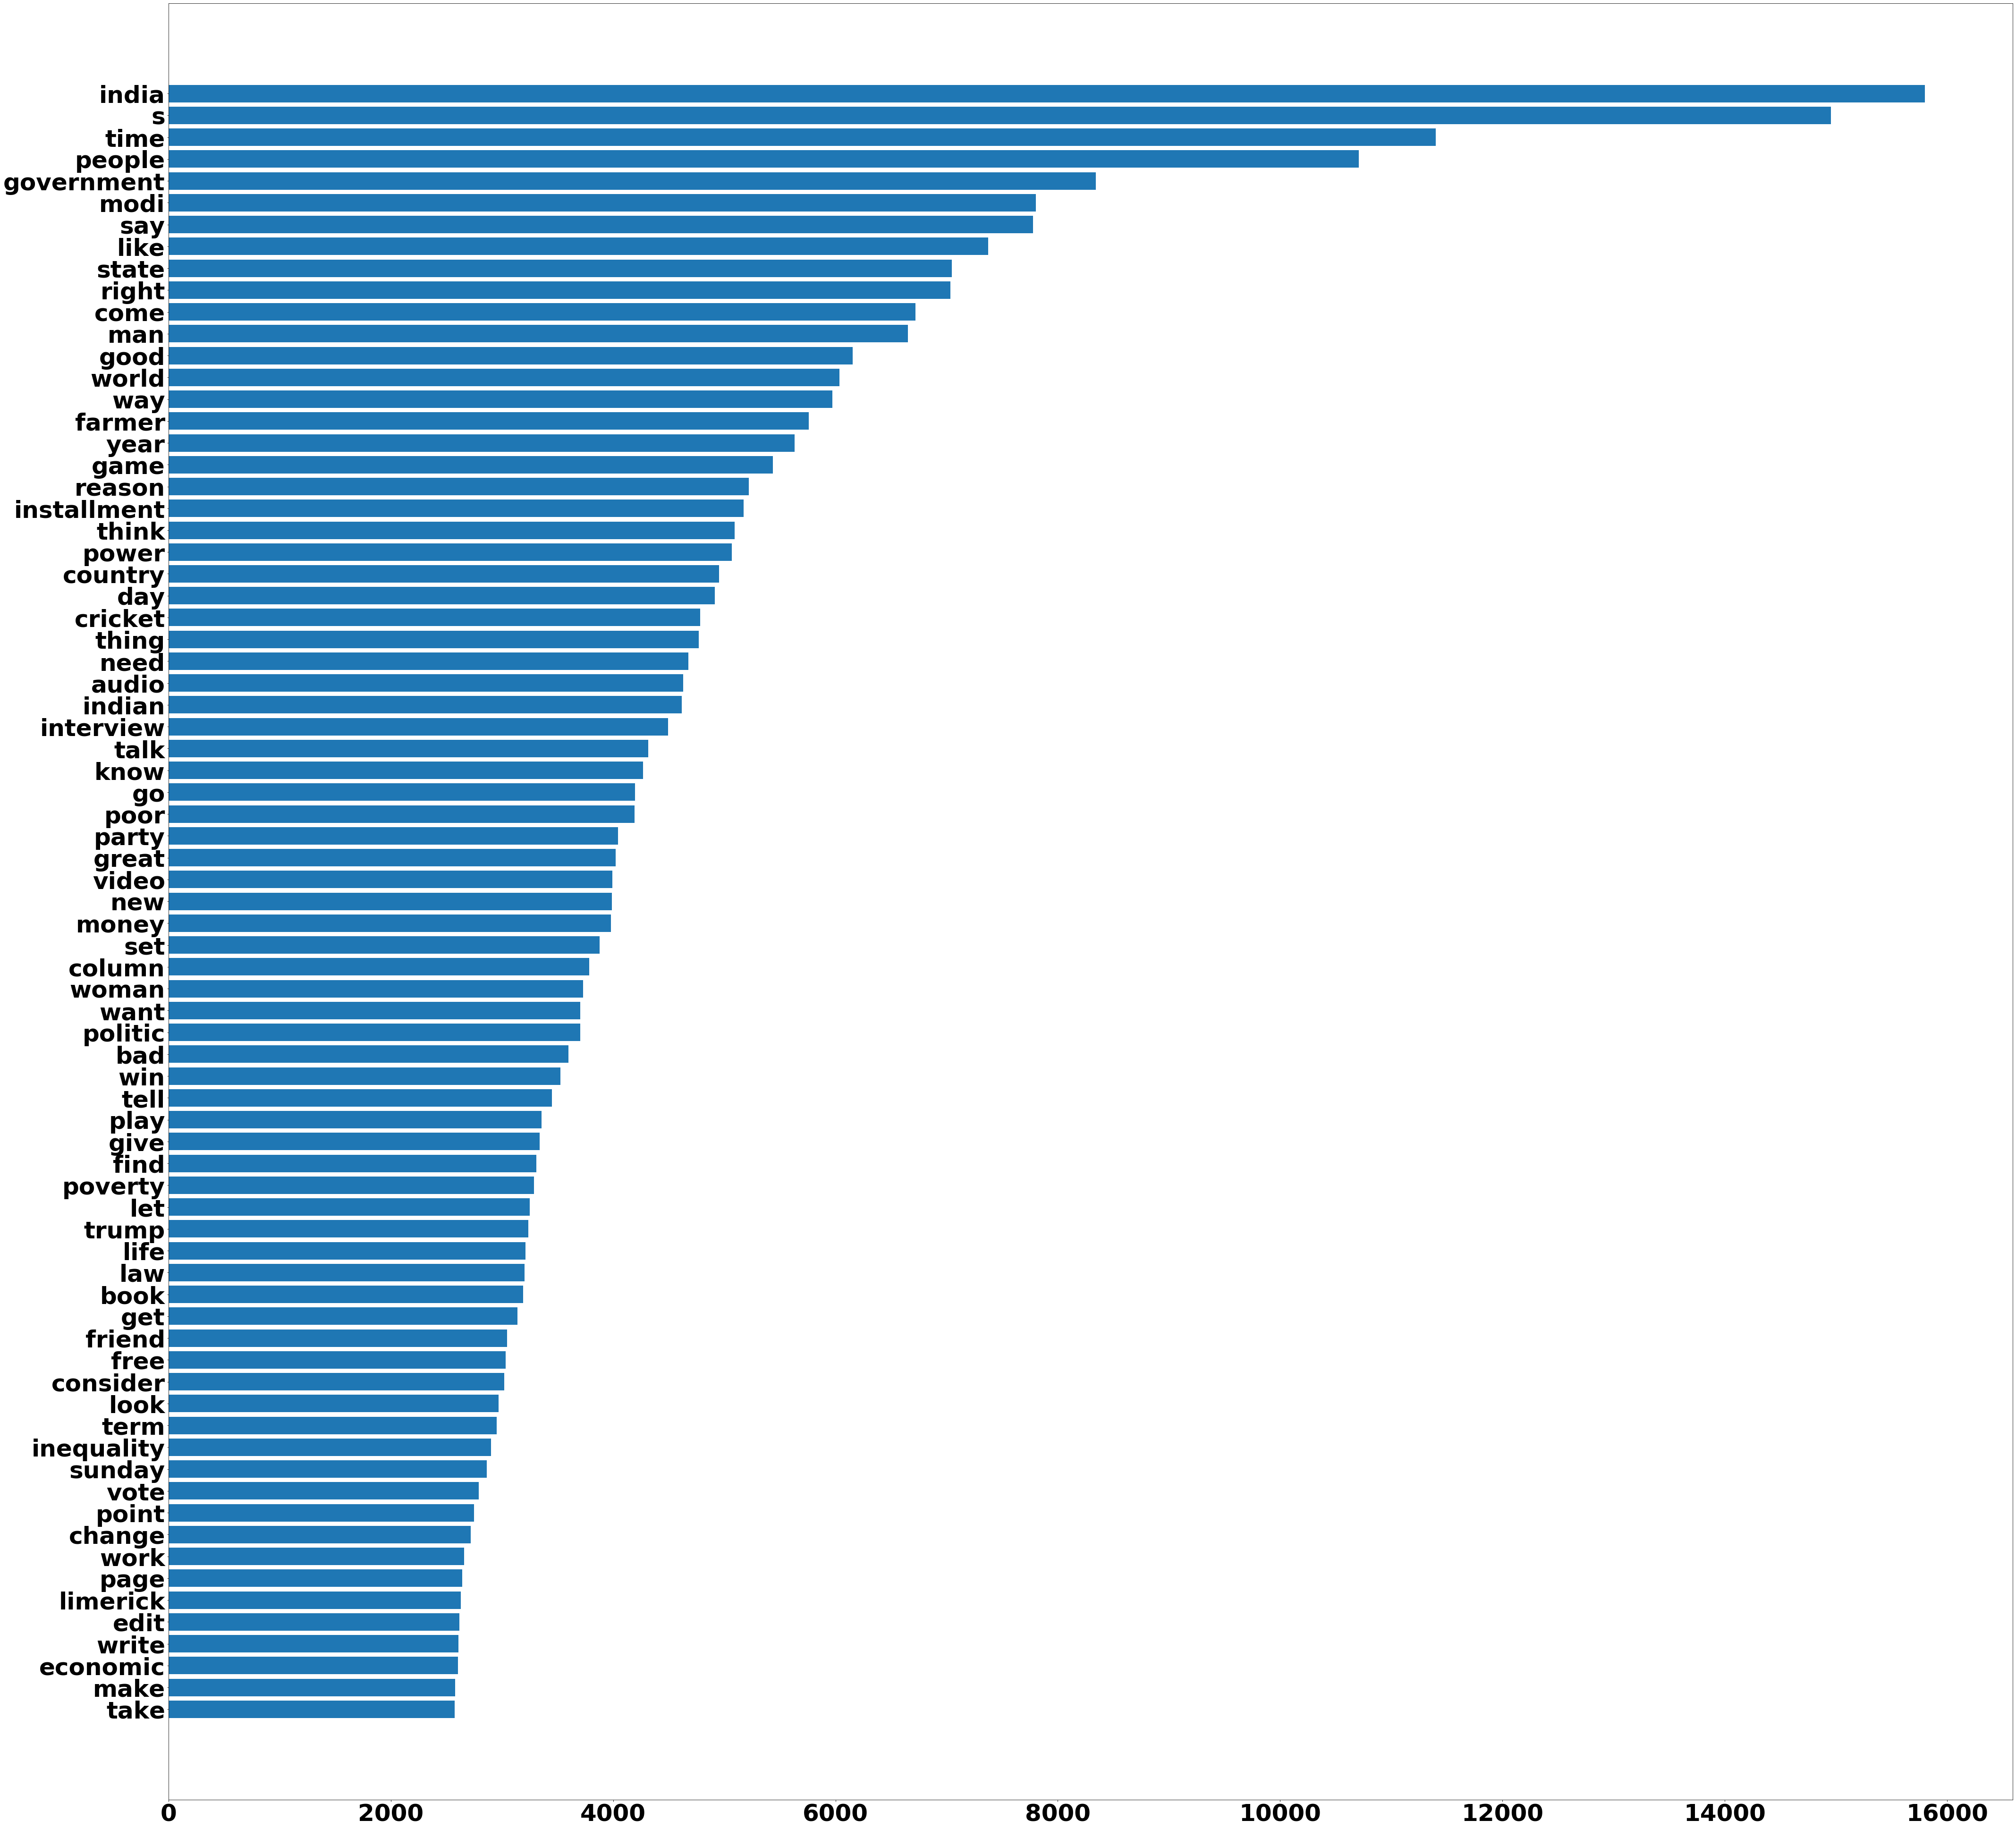

In [44]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(values[:75], counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### Frequency plot of words in blogs with stopwords retained

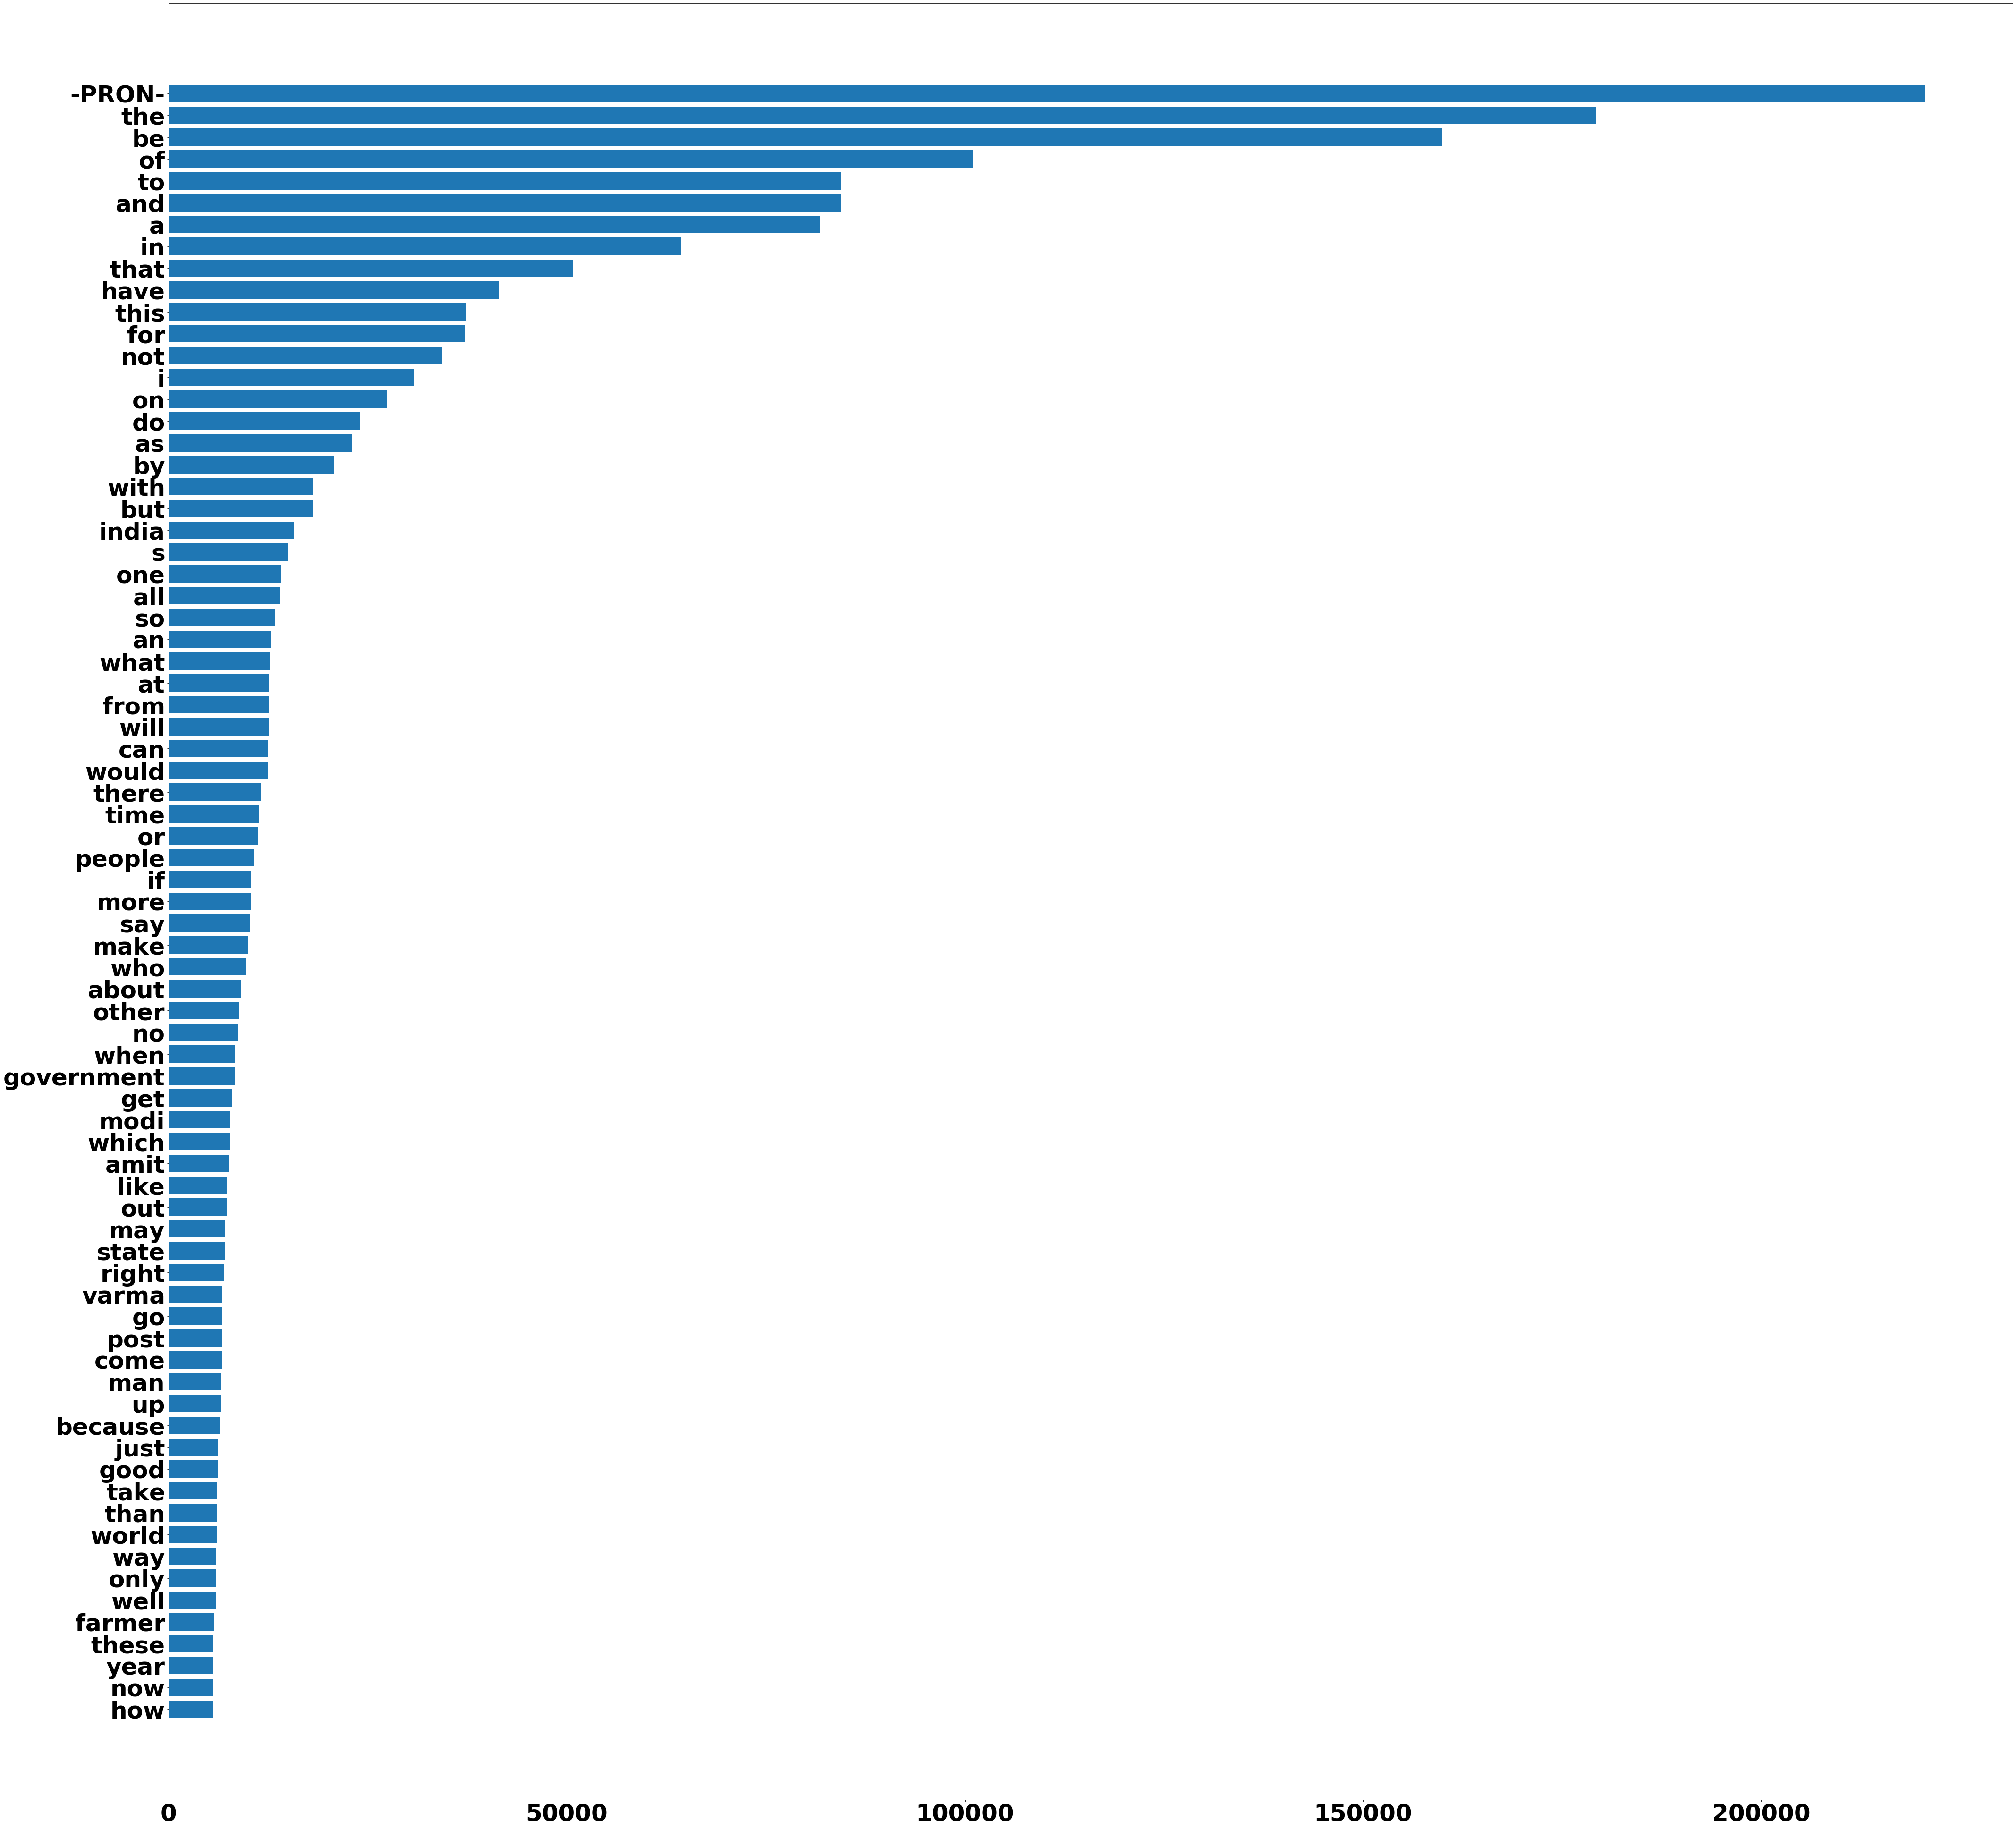

In [45]:
plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(all_values[:75], all_counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### Observations from the Frequency Plots

1) The most occuring words present in both the graphs are quite different <br>
2) The most occuring words present in graph 1 (without stopwords) makes more sense.

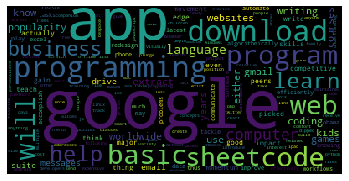

In [46]:
wordcloud = WordCloud().generate(data['text'][1])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

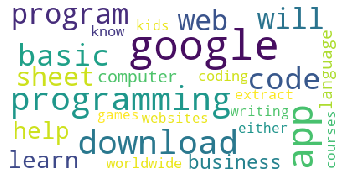

In [47]:
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="white").generate(data['text'][1])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# TF-IDF

In [48]:
## tfidf vectorizer needs sentence and not token. Hence we need to combine all the tokens back to form a string

data['clean_text_lemmatized'] = [' '.join(text) for text in data['clean_text_lemmatized']]
data['clean_text_lemmatized'][0]

'useful website internet smarter increase productivity help learn new skill incredibly useful website solve problem cool url easy memorize save trip google know useful website miss list let know send send personalize email multiple people google sheet download gmail message attachment google drive extract email address gmail message save google sheet receive file size google drive track price favorite amazon item google sheet create smart twitt bot write single line code build bespoke solution use capability feature google automate business process drive business productivity deploy big company university worldwide installation download know india google'

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=20000,
                                 min_df=0.2,
                                 use_idf=True, ngram_range=(1,4))

tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text_lemmatized'])

print(tfidf_matrix.shape)

(495, 12785)


In [50]:
terms = tfidf_vectorizer.get_feature_names()

# K-mean Clustering

### Fitting the elbow curve to identify right number of clusters/topics

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import joblib
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


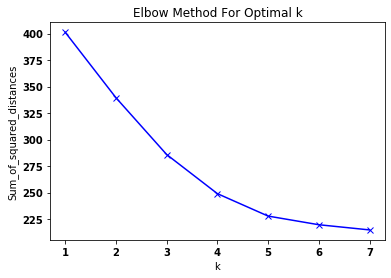

In [52]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [53]:
num_clusters = 4

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_cluster_best_K.pkl')

the cluster centers are [[0.00739545 0.00427663 0.00332896 ... 0.00332896 0.00332896 0.00332896]
 [0.0020756  0.00291343 0.00020455 ... 0.00020362 0.00020362 0.00020362]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


['doc_cluster_best_K.pkl']

### Getting the top words from each cluster

#### argsort()
[1,2,3,5,4] -----> sort ---->[1,2,3,4,5]<br>
argsort------>[0,1,2,4,3] ---> index of the element in the original list

In [54]:
km.cluster_centers_.argsort()

array([[ 3375,  2719, 10830, ...,  7311,  8228,  5392],
       [ 9423,  5387,  6987, ...,   994,  5392, 11491],
       [    0,  8514,  8515, ..., 10566, 10982,  2154],
       [    0,  8471,  8472, ...,  3375,  1768,   309]])

In [55]:
## Reversing the list so that index of max element is in 0th index
km.cluster_centers_.argsort()[:,::-1]

array([[ 5392,  8228,  7311, ..., 10830,  2719,  3375],
       [11491,  5392,   994, ...,  6987,  5387,  9423],
       [ 2154, 10982, 10566, ...,  8515,  8514,     0],
       [  309,  1768,  3375, ...,  8472,  8471,     0]])

In [56]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("\n")
    print("Top words in Cluster-%d :" % i, end='')
    print("\n")
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:


Top words in Cluster-0 :

['india'],['people'],['modi'],['government'],['farmer'],['state'],

Top words in Cluster-1 :

['time'],['india'],['blog'],['say'],['know'],['like'],

Top words in Cluster-2 :

['conversation'],['support'],['sort'],['brief'],['fascinate'],['smile'],

Top words in Cluster-3 :

['anonymous'],['color'],['essence'],['spirit'],['sex'],['mate'],

In [57]:
data['cluster_group'] = clusters
pd.DataFrame(data).head(6)

index        Author                     title  \
0      0  Amit Agarwal     Most Useful Websites    
1      1  Amit Agarwal            Learn to Code    
2      2  Amit Agarwal          Voice Dictation    
3      3  Amit Agarwal        The Best Mac Apps    
4      4  Amit Agarwal   Sell your music online    
5      5  Amit Agarwal     Mail Merge for Gmail    

                                                link  \
0  https://www.labnol.org/internet/101-useful-web...   
1  https://www.labnol.org/internet/learn-coding-o...   
2                              https://dictation.io/   
3  https://www.labnol.org/software/essential-mac-...   
4  https://www.labnol.org/internet/sell-music-onl...   
5  https://www.labnol.org/internet/personalized-m...   

                                                text  word_count  \
0  here are the most useful websites on the inter...         184   
1  the learn to code movement has picked up momen...         483   
2  use the magic of speech recognition to write e...         184   
3  whether you are a new mac user or seasoned vet...         260   
4  it is now easier than ever before to sell your...         896   
5  mail merge for gmail lets you easily send pers...         615   

                               clean_text_lemmatized  \
0  useful website internet smarter increase produ...   
1  learn code movement pick momentum worldwide ac...   
2  use magic speech recognition write email docum...   
3  new mac user seasoned veteran look s collectio...   
4  easy sell music worldwide audience musician ch...   
5  mail merge gmail let easily send personalized ...   

                                     text_lemmatized  cluster_group  
0  [here, be, the, most, useful, website, on, the...              1  
1  [the, learn, to, code, movement, have, pick, u...              1  
2  [use, the, magic, of, speech, recognition, to,...              1  
3  [whether, -PRON-, be, a, new, mac, user, or, s...              1  
4  [-PRON-, be, now, easy, than, ever, before, to...              1  
5  [mail, merge, for, gmail, let, -PRON-, easily,...              1

In [58]:
cluster_df = pd.DataFrame(data)
cluster_df['cluster_group'].value_counts()

1    234
0    128
3     73
2     60
Name: cluster_group, dtype: int64

## Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [59]:
##Step 1
cluster_df['tokenized_text'] = [text.split(' ') for text in cluster_df['clean_text_lemmatized']]

In [60]:
##Step 2
grouped_text = cluster_df.groupby('cluster_group')['tokenized_text']

In [61]:
##Step 3

from itertools import chain
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)
    
frequent_words_df.head()

counts  \
0  [13627, 11230, 9428, 8175, 8059, 7395, 6619, 6...   
1  [4631, 4082, 3833, 3640, 3220, 3039, 2346, 217...   
2  [120, 120, 60, 60, 60, 60, 60, 60, 60, 60, 60,...   
3  [83, 79, 76, 73, 73, 73, 73, 73, 73, 73, 73, 7...   

                                              values cluster_id  
0  [india, s, people, time, government, modi, sta...          0  
1  [audio, interview, video, s, time, talk, say, ...          1  
2  [support, conversation, art, trifle, touch, so...          2  
3  [life, love, offer, pursuit, bee, buzz, mate, ...          3

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


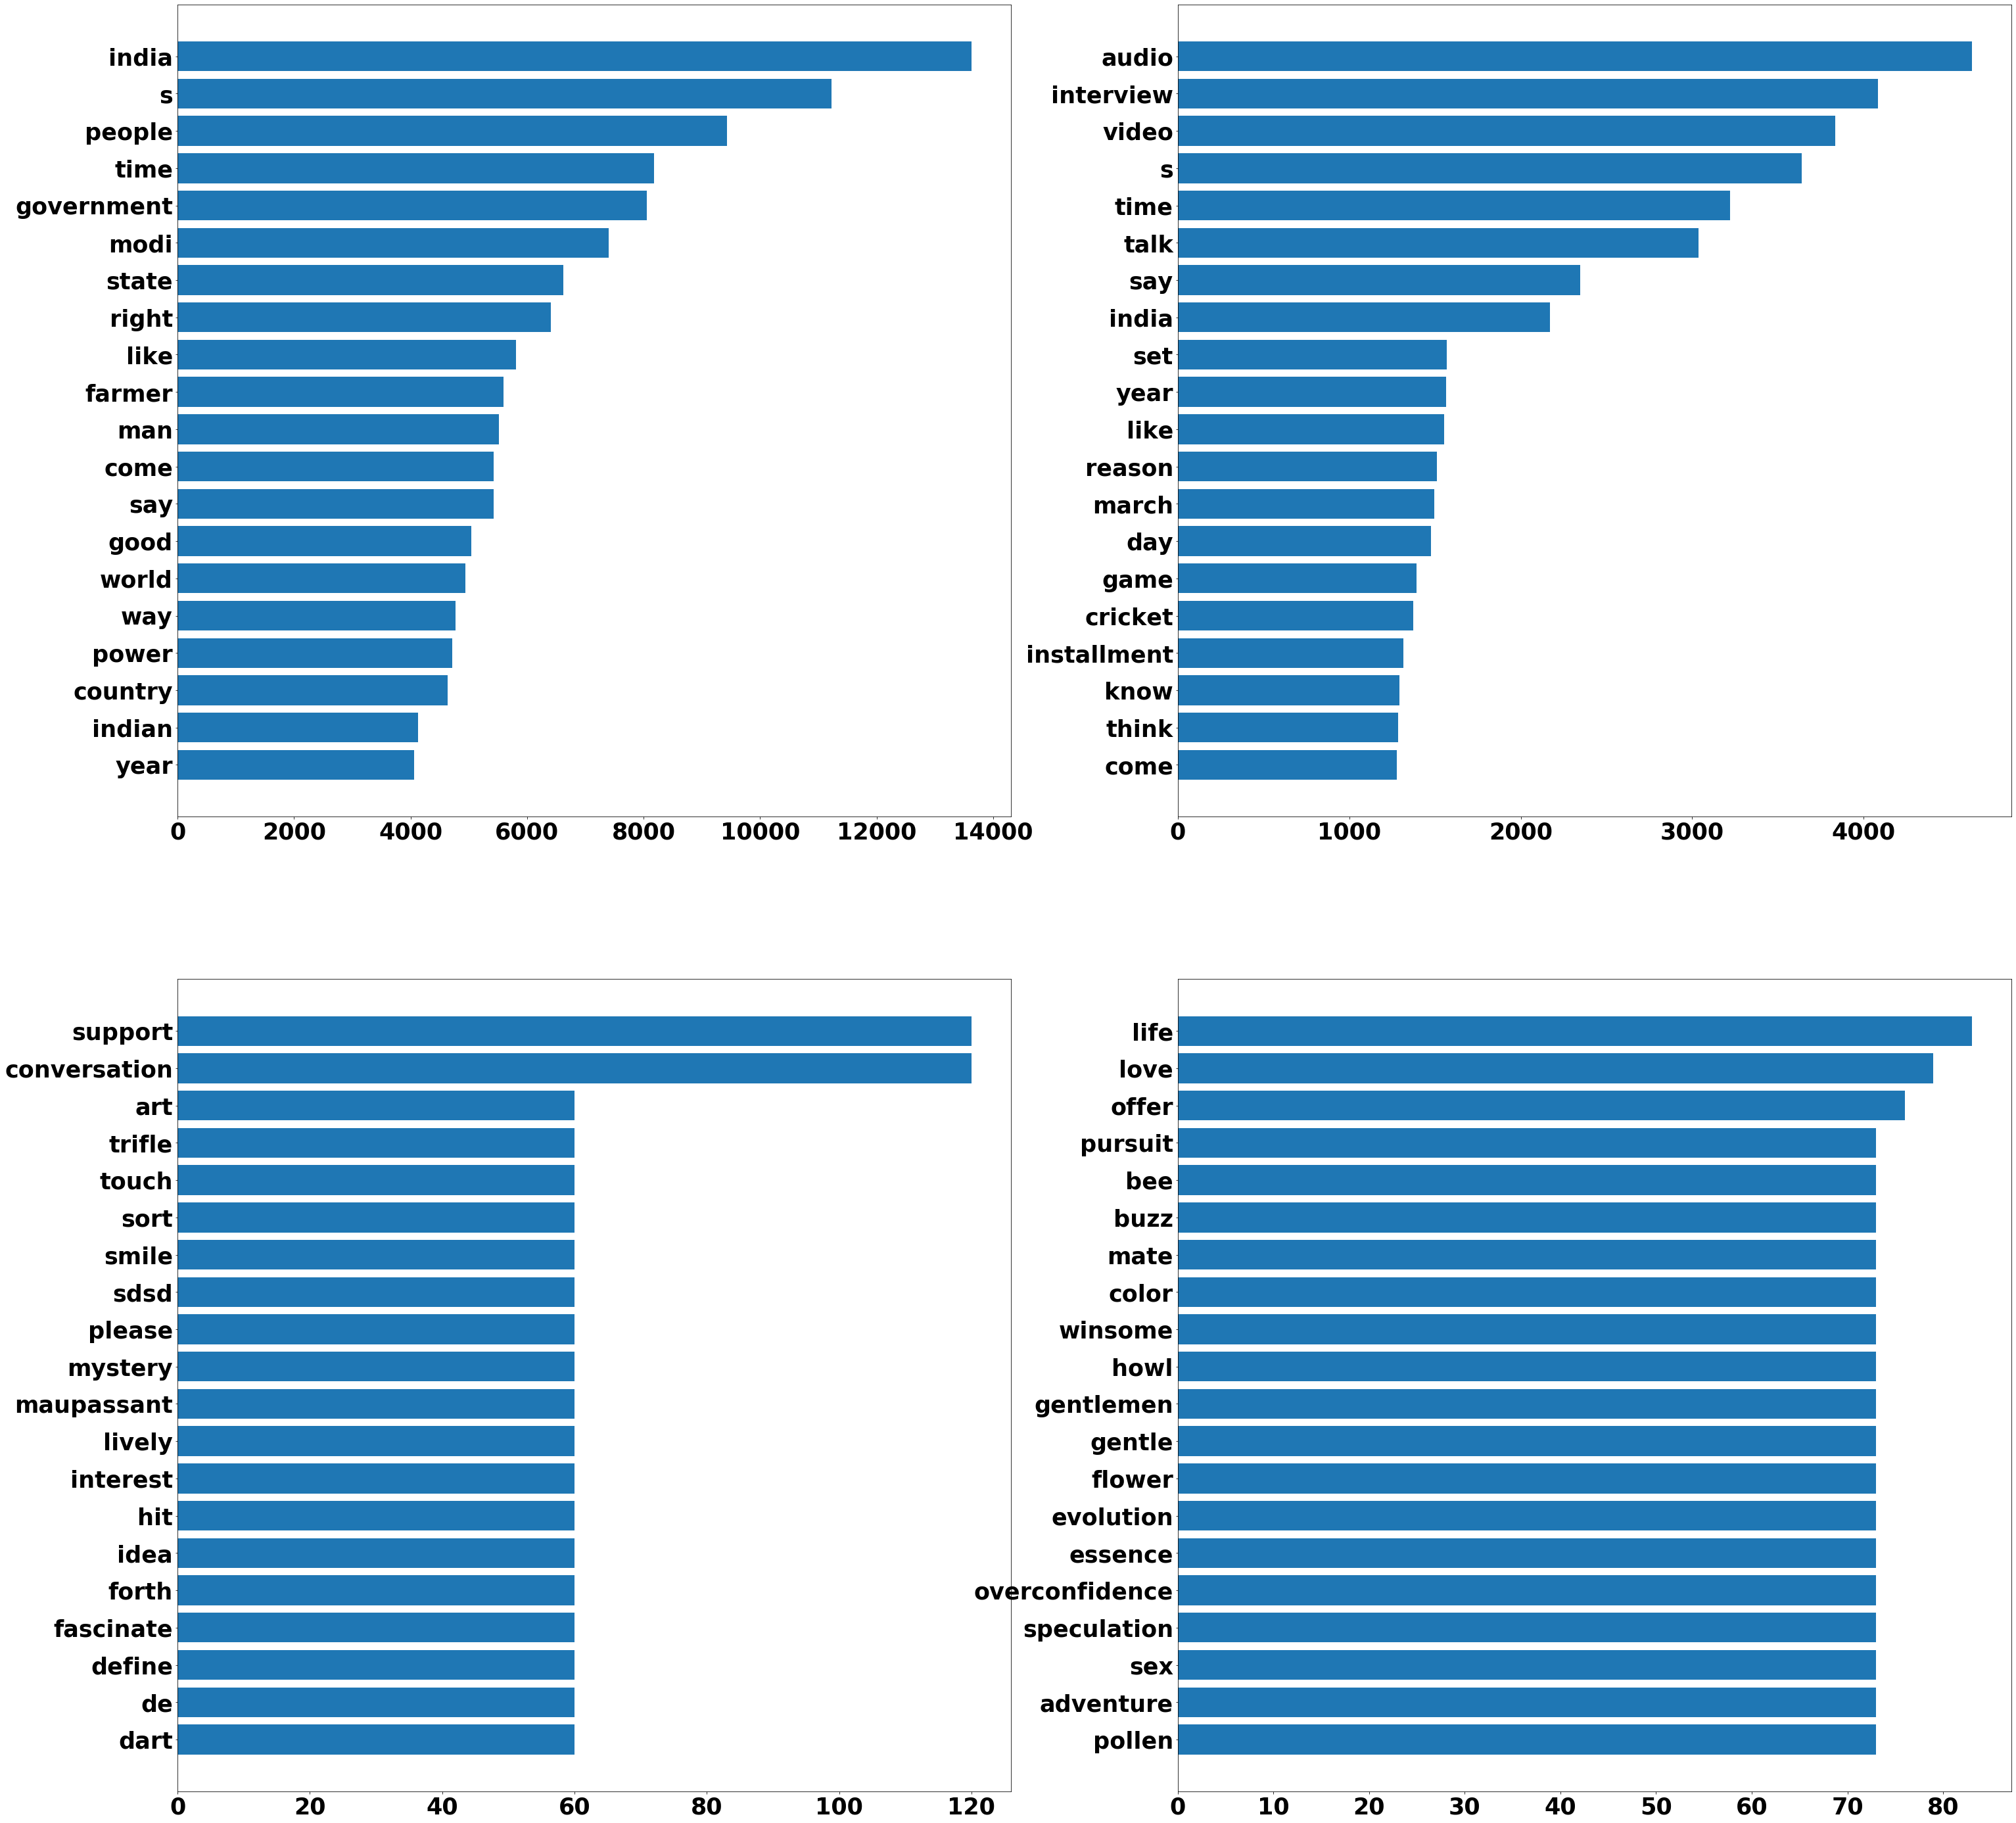

In [62]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:20], frequent_words_df.loc[2,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()

### Truncated SVD (Latent Semantic Analysis - LSA) using Scikitlearn

<img src="SVD1.png">

In this case, U ∈ ℝ^(m ⨉ t) emerges as our document-topic matrix, and V ∈ ℝ^(n ⨉ t) becomes our term-topic matrix. In both U and V, the columns correspond to one of our t topics. 

In U, rows represent document vectors expressed in terms of topics; in V, rows represent term vectors expressed in terms of topics.

In [63]:
from sklearn.decomposition import TruncatedSVD

n_components = 26

svd_model = TruncatedSVD(n_components=n_components, algorithm='randomized',n_iter=20,random_state=143)

svd_matrix = svd_model.fit(tfidf_matrix)

svd_matrix

TruncatedSVD(algorithm='randomized', n_components=26, n_iter=20,
             random_state=143, tol=0.0)

In [64]:
print(f"Explained Variance Ratio : {svd_matrix.explained_variance_ratio_}") 
print(f"\nTotal Explained Variance : {round(svd_matrix.explained_variance_ratio_.sum() * 100, 2)} %")
print(f"\nThe singular values are {svd_matrix.singular_values_}")

Explained Variance Ratio : [0.13102571 0.13371705 0.10976675 0.0736757  0.04285014 0.02856068
 0.02318133 0.01967525 0.01553407 0.01470589 0.01310142 0.01080044
 0.01050057 0.01023888 0.00933004 0.00895342 0.00866756 0.00811538
 0.00754958 0.00744952 0.00681151 0.00664673 0.00645728 0.00619196
 0.00611469 0.00593101]

Total Explained Variance : 72.56 %

The singular values are [11.45034253  7.75799771  7.0487959   5.4823715   4.2908198   3.38774107
  3.05461666  2.83549436  2.497896    2.42927764  2.29538057  2.08348672
  2.05477789  2.03002149  1.93786855  1.89625678  1.8665663   1.80459249
  1.74065027  1.72924153  1.65363453  1.63461521  1.60992906  1.57654578
  1.56734966  1.54272503]


### Picking the few most important words in each topic

The components of svd_model are our topics and we can access them using svdmodel.components.<br>
let's print a few most important words in each of the 4 topics and see how our model has done.

In [65]:
for i, comp in enumerate(svd_model.components_):
    print(f"The component is {comp} and shape is {comp.shape}")
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:6]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(f"{t[0]} -- {t[1]}")
    print(" ")

The component is [0.00817893 0.00557394 0.00306724 ... 0.00306701 0.00306701 0.00306701] and shape is (12785,)
Topic 0: 
india -- 0.24817855801352826
people -- 0.16559031978749764
time -- 0.16052990541393367
government -- 0.14501417071473063
modi -- 0.14452325720157716
farmer -- 0.12814680325644007
 
The component is [-0.00091437 -0.00015651 -0.00032849 ... -0.00033551 -0.00033551
 -0.00033551] and shape is (12785,)
Topic 1: 
conversation -- 0.4648661697013467
support -- 0.3869153094789304
sort -- 0.2712132947690386
brief -- 0.24888210138104158
fascinate -- 0.24012487919194717
smile -- 0.2303880225834742
 
The component is [-0.00152098  0.00018172 -0.00053195 ... -0.00052845 -0.00052845
 -0.00052845] and shape is (12785,)
Topic 2: 
anonymous -- 0.3553014598352445
color -- 0.3536496476845286
essence -- 0.33698192374974567
spirit -- 0.3329975823568626
sex -- 0.32898112066643276
mate -- 0.2971089738024026
 
The component is [ 0.01385929 -0.00355449 -0.00204924 ... -0.00202423 -0.00202423


### Tagging each document with a topic

In [66]:
doc_topic_matrix = svd_matrix.transform(tfidf_matrix)
print("\nDoc Topic Matrix: \n",doc_topic_matrix)
svd_categories = np.argmax(doc_topic_matrix, axis=1)
print("\nSVD Categories: \n",svd_categories)


Doc Topic Matrix: 
 [[ 0.11547776  0.00970828  0.0016965  ... -0.04317743 -0.0107698
  -0.00308097]
 [ 0.17522538  0.0125921   0.01828696 ...  0.01184656 -0.03635427
  -0.01193998]
 [ 0.08623888  0.10054359  0.0021744  ...  0.06107316 -0.02833816
   0.14770535]
 ...
 [ 0.22051125 -0.00298848  0.01607985 ...  0.01603866  0.041997
   0.08414354]
 [ 0.11590279  0.00923828  0.00338718 ... -0.033432   -0.01344741
   0.00711903]
 [ 0.14998931  0.02797919  0.0043396  ...  0.10683084 -0.04872963
  -0.09607429]]

SVD Categories: 
 [ 8  8  8  8  7  8 22  0  4  0  4  4  0  0  0  0  6  0  6  0  0  0 16  0
 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 23 23 19  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3 16  0  0  0  0
  0  0  0  0  0  0  0  0  0  3  3  3  0  0  3  3 16  0  0  0  0  0 19 16
  0  0  0  0  0  3  3  3  0  3  3  0  0  4  4  0  0  0  0  0  0  0  0  6
  6  4  0  6  0  0  0 11  4  0  0

In [67]:
data['SVD_group'] = svd_categories
pd.DataFrame(data).head(6)

index        Author                     title  \
0      0  Amit Agarwal     Most Useful Websites    
1      1  Amit Agarwal            Learn to Code    
2      2  Amit Agarwal          Voice Dictation    
3      3  Amit Agarwal        The Best Mac Apps    
4      4  Amit Agarwal   Sell your music online    
5      5  Amit Agarwal     Mail Merge for Gmail    

                                                link  \
0  https://www.labnol.org/internet/101-useful-web...   
1  https://www.labnol.org/internet/learn-coding-o...   
2                              https://dictation.io/   
3  https://www.labnol.org/software/essential-mac-...   
4  https://www.labnol.org/internet/sell-music-onl...   
5  https://www.labnol.org/internet/personalized-m...   

                                                text  word_count  \
0  here are the most useful websites on the inter...         184   
1  the learn to code movement has picked up momen...         483   
2  use the magic of speech recognition to write e...         184   
3  whether you are a new mac user or seasoned vet...         260   
4  it is now easier than ever before to sell your...         896   
5  mail merge for gmail lets you easily send pers...         615   

                               clean_text_lemmatized  \
0  useful website internet smarter increase produ...   
1  learn code movement pick momentum worldwide ac...   
2  use magic speech recognition write email docum...   
3  new mac user seasoned veteran look s collectio...   
4  easy sell music worldwide audience musician ch...   
5  mail merge gmail let easily send personalized ...   

                                     text_lemmatized  cluster_group  SVD_group  
0  [here, be, the, most, useful, website, on, the...              1          8  
1  [the, learn, to, code, movement, have, pick, u...              1          8  
2  [use, the, magic, of, speech, recognition, to,...              1          8  
3  [whether, -PRON-, be, a, new, mac, user, or, s...              1          8  
4  [-PRON-, be, now, easy, than, ever, before, to...              1          7  
5  [mail, merge, for, gmail, let, -PRON-, easily,...              1          8

#### Clustering the Document-Topic matrix

In [68]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(doc_topic_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

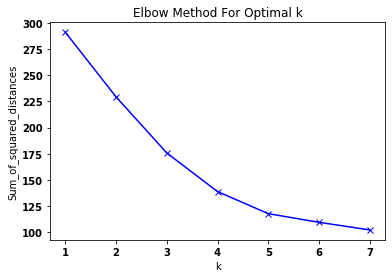

In [69]:
## Plot the elbow

## Distortion, on the y-axis, corresponds to our cost function: 
## the sum of squared difference between each data point and the centroid, i.e., the cluster centre.

## As K increases the corresponding distortion value will tend to zero, 
## because you end up having just one data point per cluster. With only one data point in per cluster, 
## the centroid is the data point itself, so the distortion will be equal to zero.

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [70]:
num_clusters = 4

km = KMeans(n_clusters=num_clusters)

km.fit(doc_topic_matrix)

clusters = km.labels_.tolist()

centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_topic_cluster_best_K.pkl')

the cluster centers are [[ 7.85990422e-02  9.95954285e-01 -3.47758926e-02  8.88207388e-03
  -1.60387696e-02  1.39569699e-02  6.90181121e-03 -3.63053332e-03
   4.83058961e-03  2.13254257e-04 -1.23099801e-04  5.95745233e-04
   4.40511953e-04  8.51782802e-04  1.13696905e-03 -6.05413140e-05
  -3.24753676e-05  3.10066272e-04 -6.68098213e-04 -4.61325857e-04
   1.57801338e-03 -2.83051303e-04 -2.02304032e-04 -3.53779789e-06
   1.06821174e-03 -6.40075217e-04]
 [ 2.90085760e-01  6.50529147e-04  2.89690537e-02  1.11977202e-01
   1.73135141e-01 -2.94655760e-02 -9.95875698e-03  4.04137333e-02
   3.81528593e-03 -9.10958144e-03  3.18668133e-03  1.00912237e-02
  -1.36210157e-02  1.20489106e-02  8.04686618e-03  5.34407802e-03
   1.11508583e-02  2.38436920e-03 -4.84414013e-03  1.93708009e-03
  -9.77952146e-04 -9.76200375e-03  4.72111188e-03  7.03054261e-03
   9.97616145e-03 -9.56786466e-04]
 [ 9.07287851e-01 -3.98629886e-02 -5.53538222e-02 -9.24898213e-02
  -1.04255954e-01  1.95816100e-02 -1.04574161e-0

['doc_topic_cluster_best_K.pkl']

In [71]:
clusters = km.labels_.tolist()
data['doc_topic_cluster_group'] = clusters

In [72]:
doc_cluster_df = pd.DataFrame(data)
doc_cluster_df['doc_topic_cluster_group'].value_counts()

1    238
2    128
3     69
0     60
Name: doc_topic_cluster_group, dtype: int64

#### Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [73]:
##Step 1
doc_cluster_df['tokenized_text'] = [text.split(' ') for text in doc_cluster_df['clean_text_lemmatized']]

In [74]:
##Step 2
grouped_text = doc_cluster_df.groupby('doc_topic_cluster_group')['tokenized_text']

In [75]:
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

In [76]:
for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)
    
    
frequent_words_df.head()

counts  \
0  [120, 120, 60, 60, 60, 60, 60, 60, 60, 60, 60,...   
1  [4631, 4082, 3833, 3642, 3220, 3039, 2348, 217...   
2  [13627, 11230, 9428, 8175, 8059, 7395, 6619, 6...   
3  [79, 72, 69, 69, 69, 69, 69, 69, 69, 69, 69, 6...   

                                              values cluster_id  
0  [support, conversation, art, trifle, touch, so...          0  
1  [audio, interview, video, s, time, talk, say, ...          1  
2  [india, s, people, time, government, modi, sta...          2  
3  [life, offer, gentle, bee, stag, color, spirit...          3

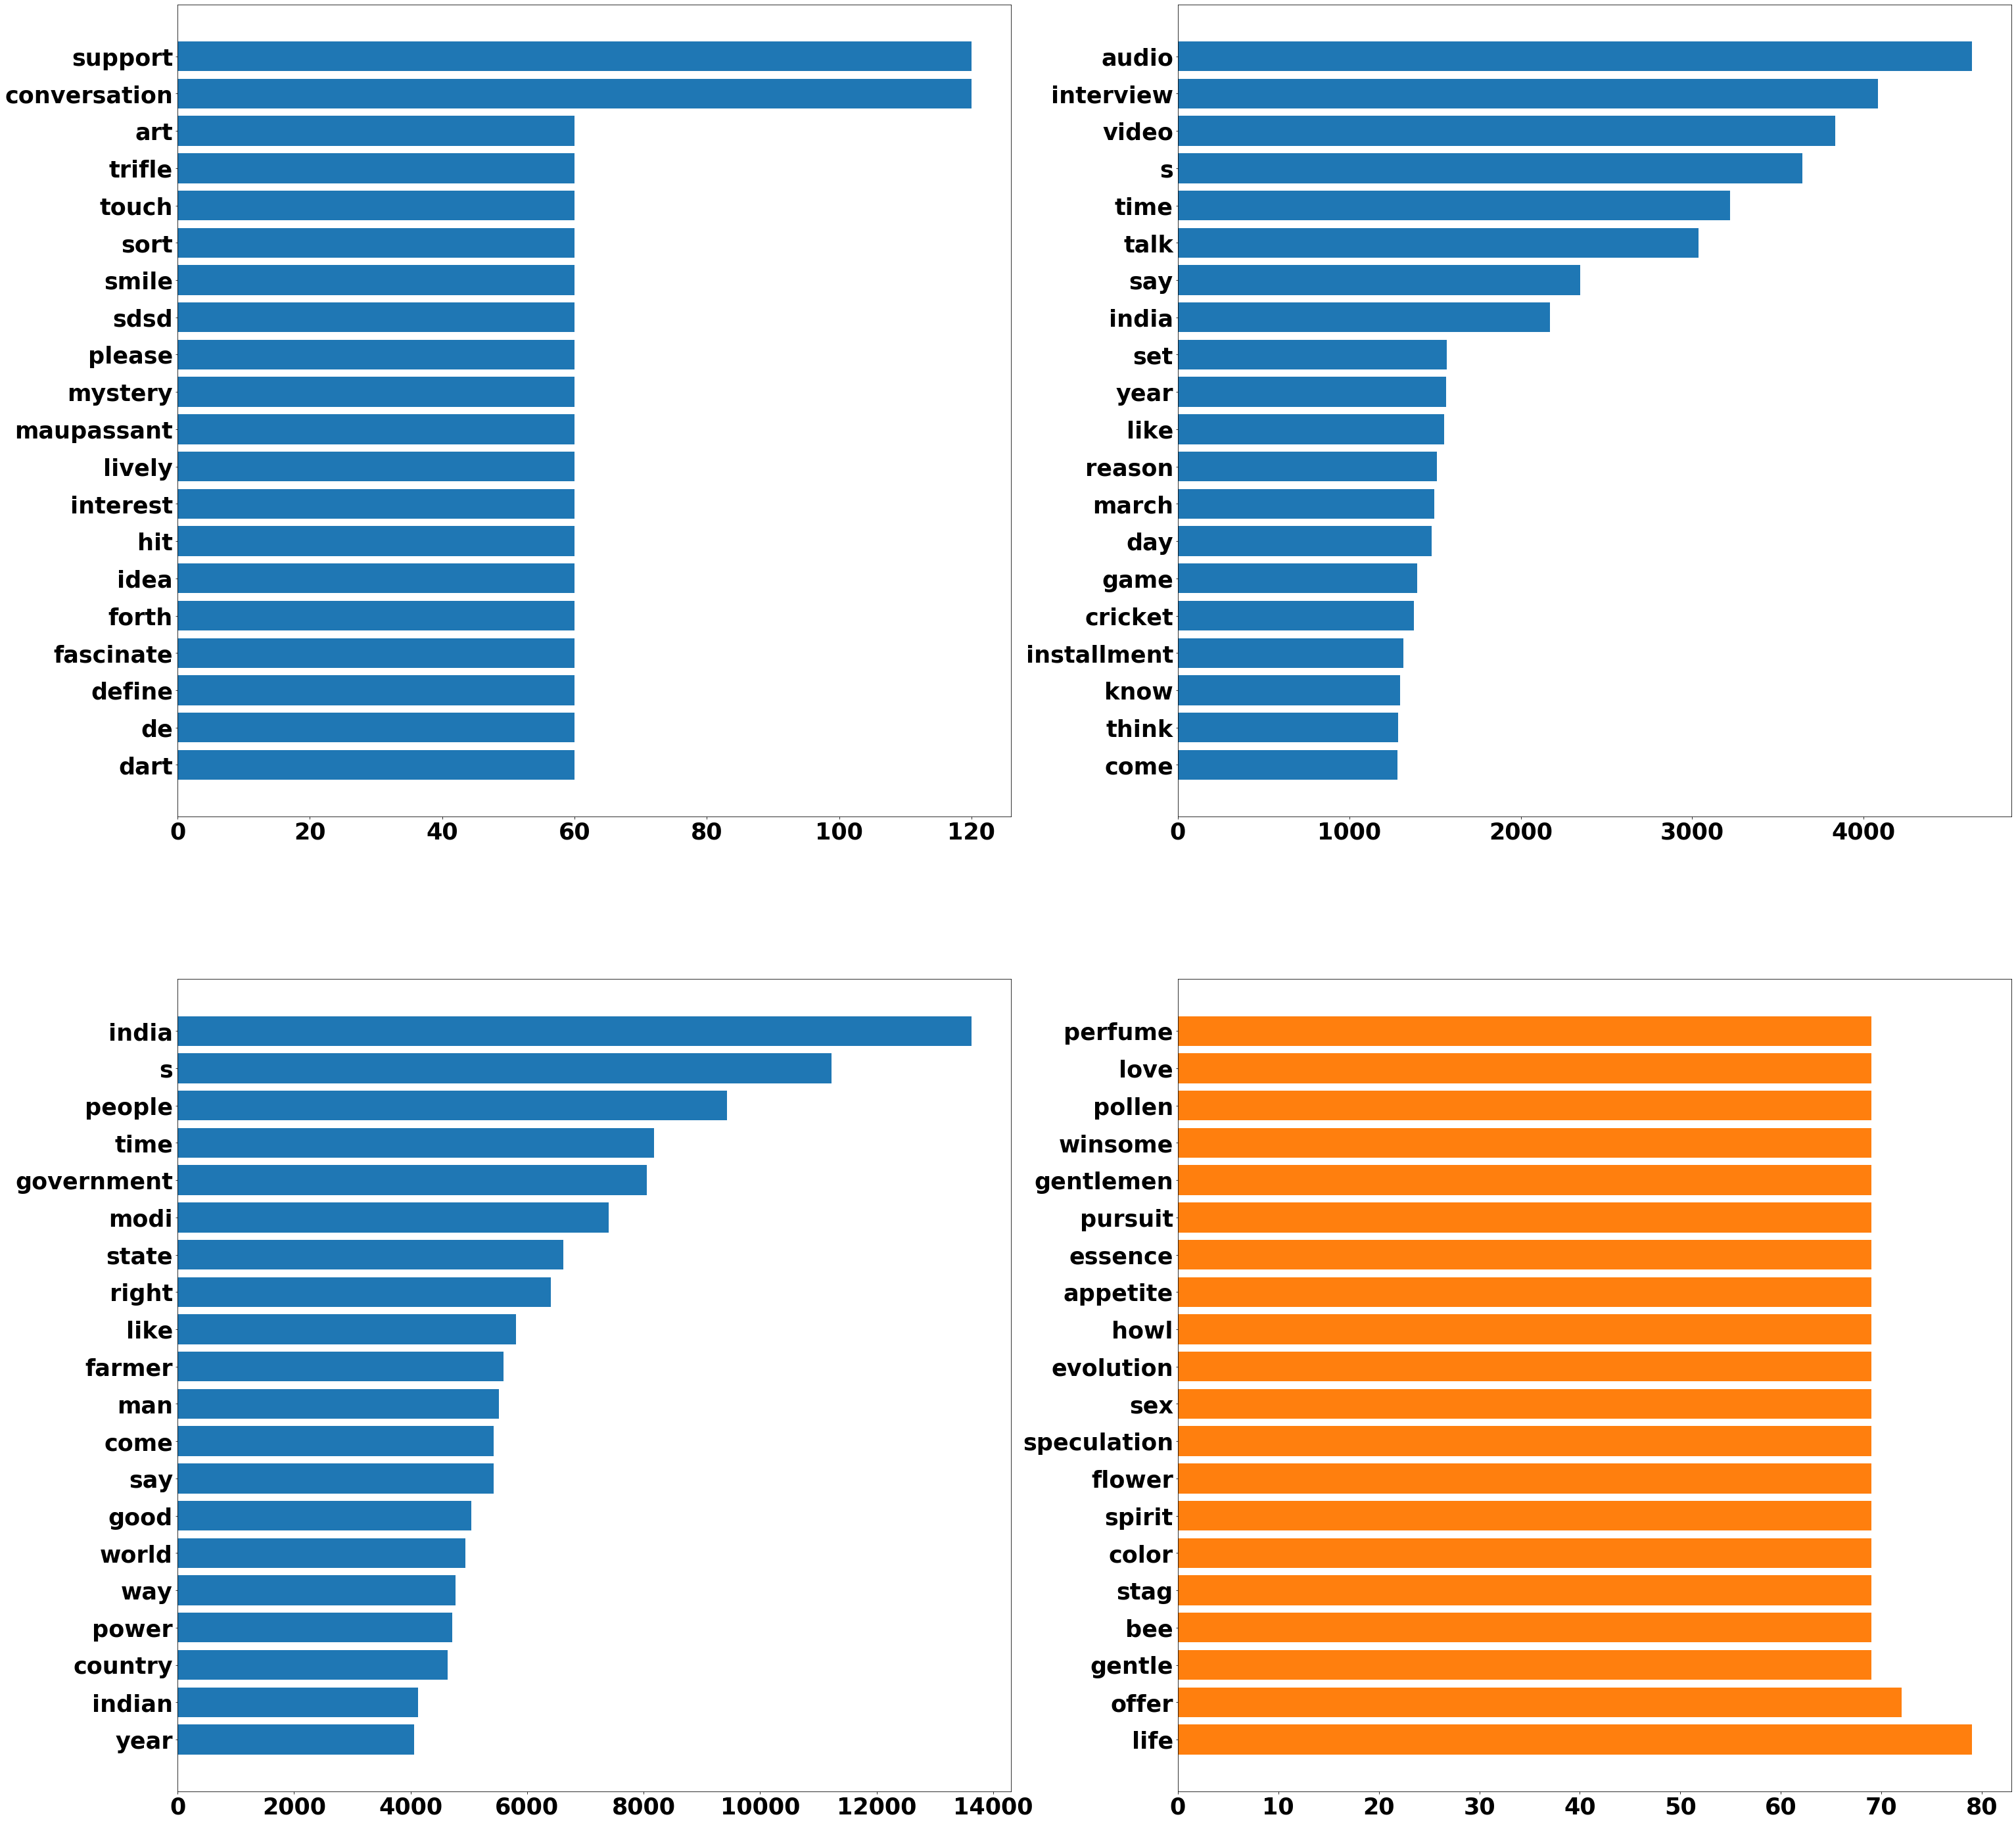

In [77]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:20], frequent_words_df.loc[2,'counts'][:20])
plt.gca().invert_yaxis()
plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:20], frequent_words_df.loc[3,'counts'][:20])
plt.gca().invert_yaxis()

## Observations

We can notice that with document topic matrix (with just 26 components) we were able to achieve similar results when compared to tfidf matrix. 

## References:
    
    **Beautiful soup**
    
    https://www.crummy.com/software/BeautifulSoup/bs4/doc/